# Data Understanding & Preparation


 

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
plt.rcParams['figure.figsize'] = [10, 9]

In [52]:
colors_list = ['#FB8369', '#FBDC69', '#A1FB69', '#69E4FB', '#6990FB','#C669FB','#FB6991']
light_colors_list = ['#F5B4B4', '#F5B4DB', '#EFB4F5', '#C8B4F5', '#B4C9F5','#B4F5E2','#CDF5B4', '#F5F4B4']

In [53]:
df = pd.read_csv('words_glasgow.csv')

In [54]:
df_poly = pd.read_csv('words_polysemy_values.csv')

In [55]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [56]:
type(df.values)

numpy.ndarray

In [57]:
df.shape

(4682, 13)

In [58]:
# total 
df.word.nunique() + df_poly.word.nunique()

5553

In [59]:
# the set in terms of its distribution of word-initial letters

In [60]:
df.std()

length             2.006230e+00
arousal            1.097163e+00
valence            1.594344e+00
dominance          9.306694e-01
concreteness       1.433689e+00
imageability       1.363110e+00
familiarity        9.212176e-01
aoa                1.252770e+00
semsize            1.023293e+00
gender             9.122927e-01
polysemy           2.727849e-01
web_corpus_freq    8.490144e+07
dtype: float64

In [61]:
df_columns_list = df.columns.values.tolist()
df_columns_list

['word',
 'length',
 'arousal',
 'valence',
 'dominance',
 'concreteness',
 'imageability',
 'familiarity',
 'aoa',
 'semsize',
 'gender',
 'polysemy',
 'web_corpus_freq']

## Data Semantics
 * Introducing the variables with their meaning and characteristics;

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4682 non-null   object 
 1   length           4682 non-null   int64  
 2   arousal          4682 non-null   float64
 3   valence          4682 non-null   float64
 4   dominance        4682 non-null   float64
 5   concreteness     4682 non-null   float64
 6   imageability     4682 non-null   float64
 7   familiarity      4682 non-null   float64
 8   aoa              4682 non-null   float64
 9   semsize          4682 non-null   float64
 10  gender           4682 non-null   float64
 11  polysemy         4682 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 475.6+ KB


### Here we present a classification of the attributes by scale type:

#### Categorical Attributes:
* word - object

###### Boolean Attributes:
* polysemy - integer (0 - NO, 1 - YES)

##### Numerical Attributes:
* length - 64-bit integer - Discrete
* arousal - float - Continuous
* valence - float - Continuous
* dominance - float - Continuous
* concreteness - float - Continuous
* imageability - float - Continuous
* familiarity - float - Continuous
* aoa - float - Continuous
* semsize - float - Continuous
* gender - float - Continuous
* web_corpus_freq - float - Continuous



In [63]:
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


In [64]:
desc = {'Name': [], 'Type': [], 'Domain':[]}
df_desc = pd.DataFrame(data=desc)
df_desc

,Name,Type,Domain


In [65]:
desc = [{'Name': '', 'Type': '', 'Domain': ''}]
#df_desc = pd.DataFrame(data=desc)

for item in df_columns_list:
    if item != 'word':
        if len(df_desc.Name) == 0:
            desc.append(
                {'Name': item, 'Type': df[item].dtypes, 'Domain': (min(df[item]), max(df[item]))}
            )
        #df_desc.Name[i] = item
        #df_desc.Description[i] = 'desc'
        #df_desc.Type[i] = df[item].dtypes
        #df_desc.Domain[i] = (min(df[item]), max(df[item]))
        #i = i + 1
        
df_desc = pd.DataFrame(data=desc)
#if len(df_desc.Name) == 0:
df_desc = df_desc.iloc[1: , :]
df_desc

,Name,Type,Domain
1,length,int64,"(2, 16)"
2,arousal,float64,"(2.057, 8.177)"
3,valence,float64,"(1.03, 8.647)"
4,dominance,float64,"(1.941, 8.371)"
5,concreteness,float64,"(1.636, 6.938)"
6,imageability,float64,"(1.737, 6.941)"
7,familiarity,float64,"(1.647, 6.939)"
8,aoa,float64,"(1.219, 6.971)"
9,semsize,float64,"(1.375, 6.912)"
10,gender,float64,"(1.0, 6.971)"


In [66]:
df['gender'].median()

4.121

In [67]:
# representing only 9 dimensions 
df_dims = df[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender']]
df_dims.head()

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
0,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
1,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303
2,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971
3,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167
4,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571


In [68]:
df_dims_mean_std = df_dims.agg([np.mean, np.std])
df_dims_mean_std

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
mean,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933
std,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293


<AxesSubplot:>

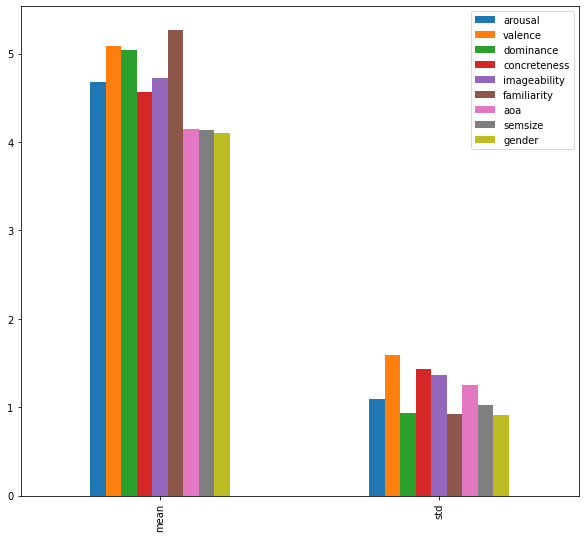

In [69]:
df_dims_mean_std.plot(kind = 'bar')

In [70]:
df_cor = df.corr()
df_cor.style.background_gradient(cmap='coolwarm')

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679


In [71]:
# correlation of only 9 dimensions 
df_dims_corr = df_dims.corr()
df_dims_corr.style.background_gradient(cmap='coolwarm')

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
arousal,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571
valence,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254
dominance,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673
concreteness,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861
imageability,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241
familiarity,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483
aoa,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803
semsize,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873
gender,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000


In [72]:
# highly correlated (>0.51) pais --> (CNC_IMAG) (VAL_DOM) (FAM_AOA) (SIZE_AROU)

df_dims_corr = df_dims[['concreteness', 'imageability', 'valence', 'dominance', 'familiarity', 'aoa', 'semsize', 'arousal']].corr()
df_dims_corr.style.background_gradient(cmap='coolwarm')

,concreteness,imageability,valence,dominance,familiarity,aoa,semsize,arousal
concreteness,1.000000,0.909305,0.056234,0.036157,0.094330,-0.381269,-0.406168,-0.248671
imageability,0.909305,1.000000,0.092339,0.068979,0.214810,-0.494037,-0.328131,-0.084990
valence,0.056234,0.092339,1.000000,0.723138,0.244815,-0.189220,0.066223,0.326418
dominance,0.036157,0.068979,0.723138,1.000000,0.193922,-0.130277,0.085684,0.362653
familiarity,0.094330,0.214810,0.244815,0.193922,1.000000,-0.672021,0.033043,0.180115
aoa,-0.381269,-0.494037,-0.189220,-0.130277,-0.672021,1.000000,0.232247,-0.005560
semsize,-0.406168,-0.328131,0.066223,0.085684,0.033043,0.232247,1.000000,0.512953
arousal,-0.248671,-0.084990,0.326418,0.362653,0.180115,-0.005560,0.512953,1.000000


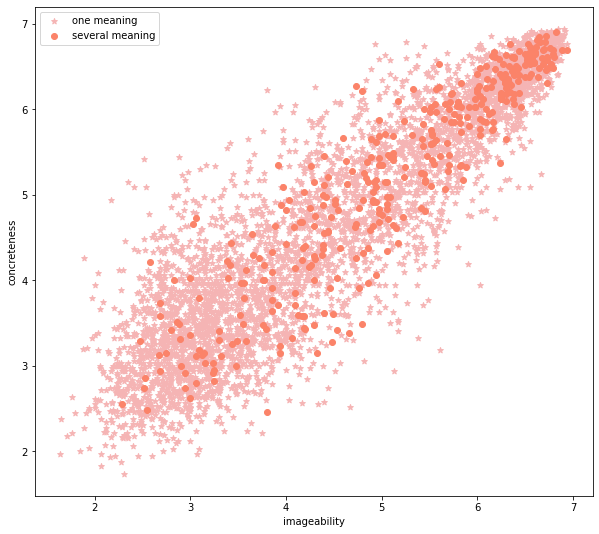

In [73]:
# trying scatter plot of highly correlated attributes
plt.scatter(df[df['polysemy'] == 0]['concreteness'],
            df[df['polysemy'] == 0]['imageability'], color=light_colors_list[0], marker='*', label='one meaning')
plt.scatter(df[df['polysemy'] == 1]['concreteness'],
            df[df['polysemy'] == 1]['imageability'], color=colors_list[0], label='several meaning')
plt.xlabel('imageability')
plt.ylabel('concreteness')
plt.legend()
plt.show()

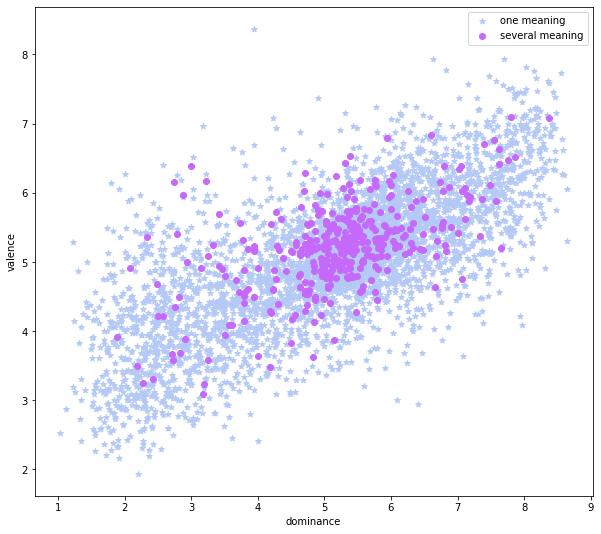

In [74]:
# trying scatter plot of highly correlated attributes
plt.scatter(df[df['polysemy'] == 0]['valence'],
            df[df['polysemy'] == 0]['dominance'], color=light_colors_list[4], marker='*', label='one meaning')
plt.scatter(df[df['polysemy'] == 1]['valence'],
            df[df['polysemy'] == 1]['dominance'], color=colors_list[5], label='several meaning')
plt.xlabel('dominance')
plt.ylabel('valence')
plt.legend()
plt.show()

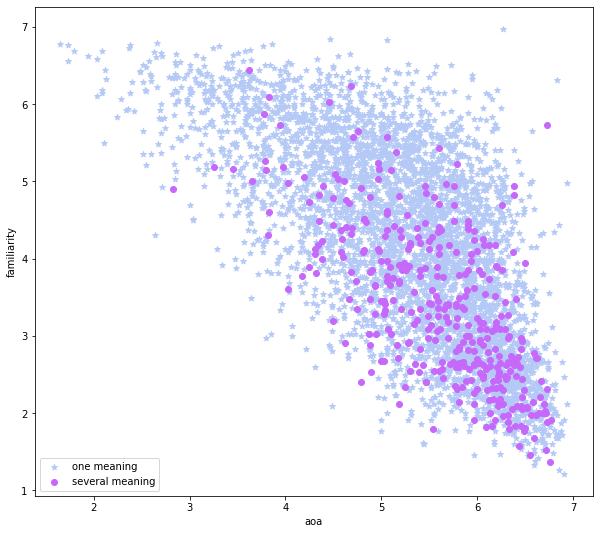

In [75]:
# trying scatter plot of highly correlated attributes
plt.scatter(df[df['polysemy'] == 0]['familiarity'],
            df[df['polysemy'] == 0]['aoa'], color=light_colors_list[4], marker='*', label='one meaning')
plt.scatter(df[df['polysemy'] == 1]['familiarity'],
            df[df['polysemy'] == 1]['aoa'], color=colors_list[5], label='several meaning')
plt.xlabel('aoa')
plt.ylabel('familiarity')
plt.legend()
plt.show()

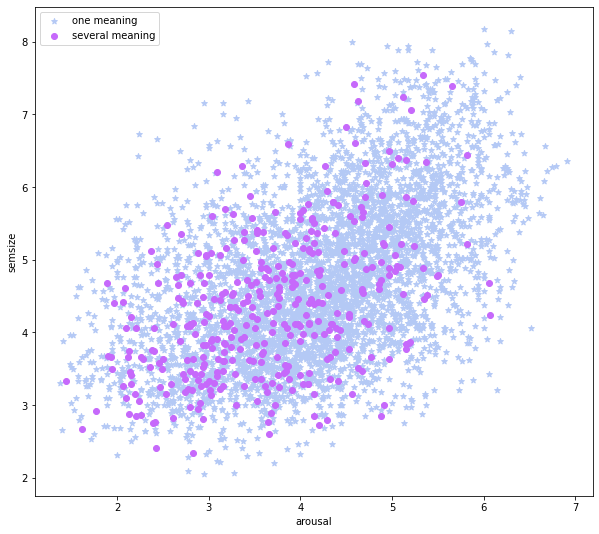

In [76]:
# trying scatter plot of highly correlated attributes
plt.scatter(df[df['polysemy'] == 0]['semsize'],
            df[df['polysemy'] == 0]['arousal'], color=light_colors_list[4], marker='*', label='one meaning')
plt.scatter(df[df['polysemy'] == 1]['semsize'],
            df[df['polysemy'] == 1]['arousal'], color=colors_list[5], label='several meaning')
plt.xlabel('arousal')
plt.ylabel('semsize')
plt.legend()
plt.show()

In [77]:
df.nunique()

word               4682
length               14
arousal             964
valence            1219
dominance           926
concreteness       1023
imageability       1006
familiarity        1005
aoa                 953
semsize             939
gender             1022
polysemy              2
web_corpus_freq    4665
dtype: int64

<AxesSubplot:>

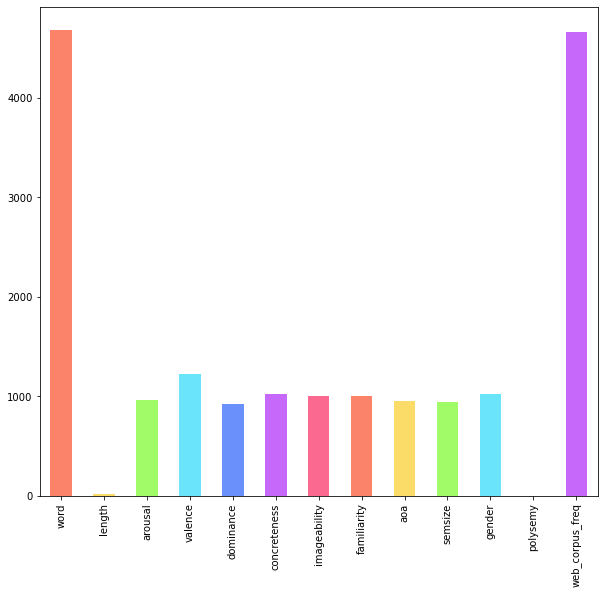

In [78]:
unique = df.nunique()
unique.plot(kind='bar', 
           color=colors_list)

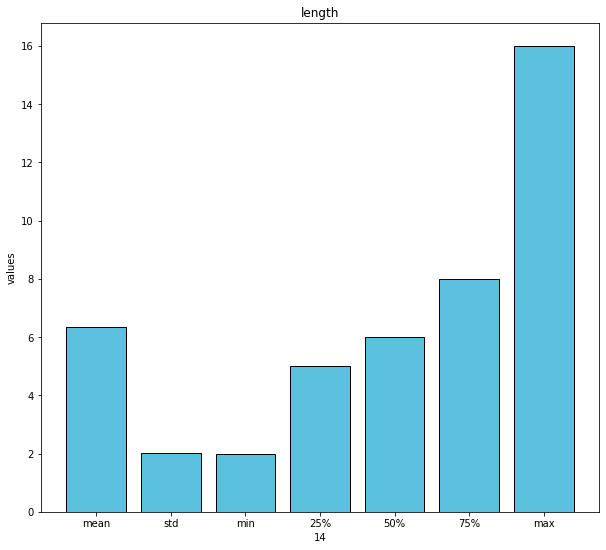

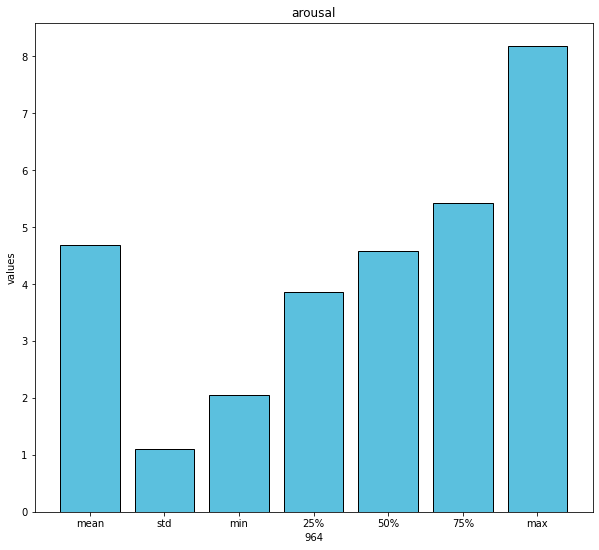

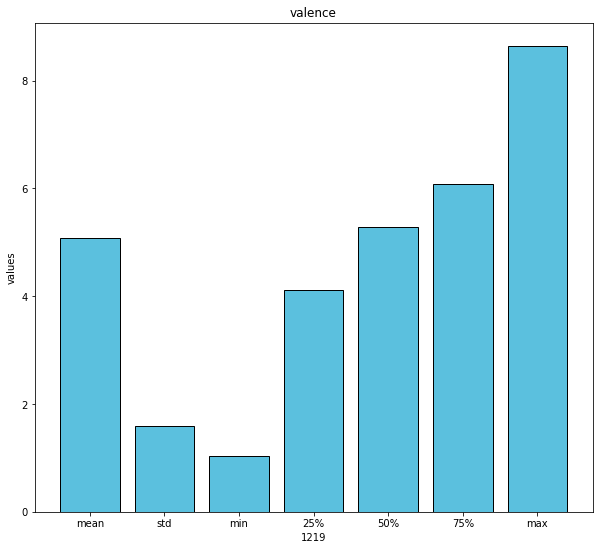

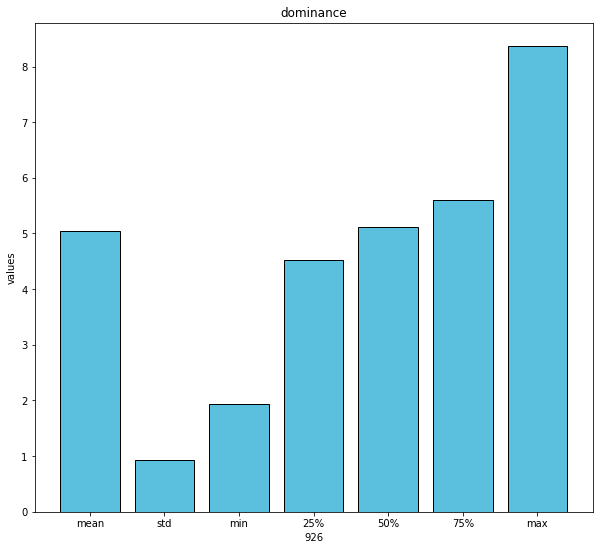

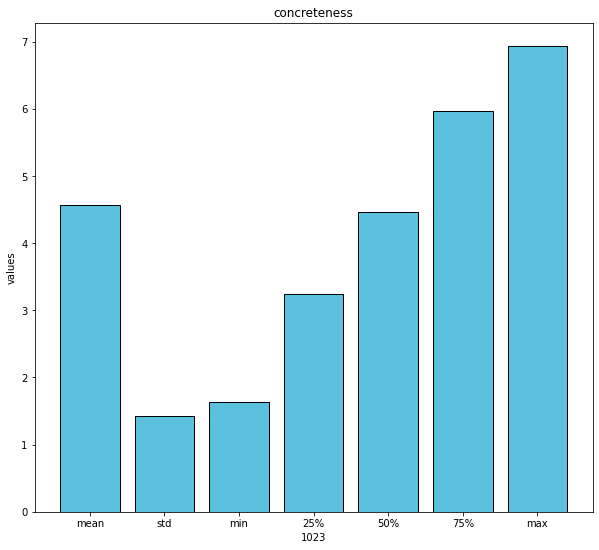

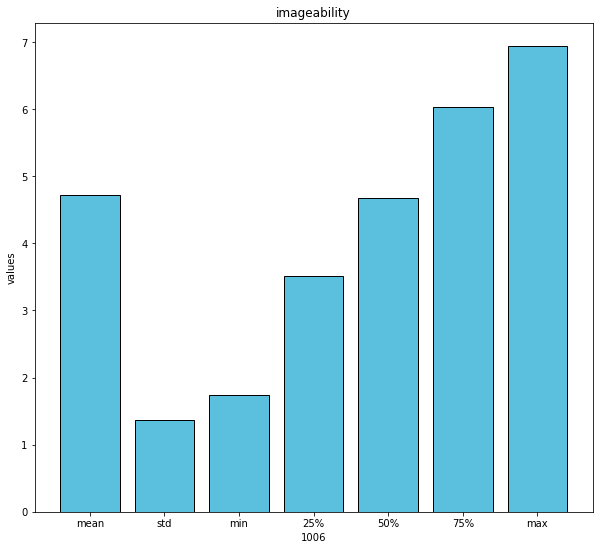

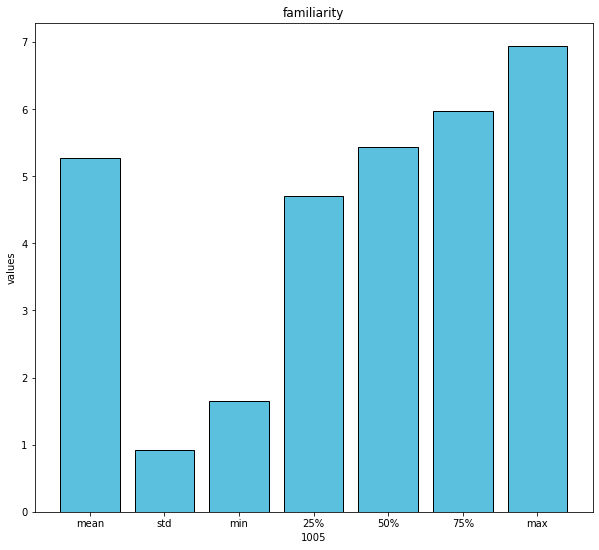

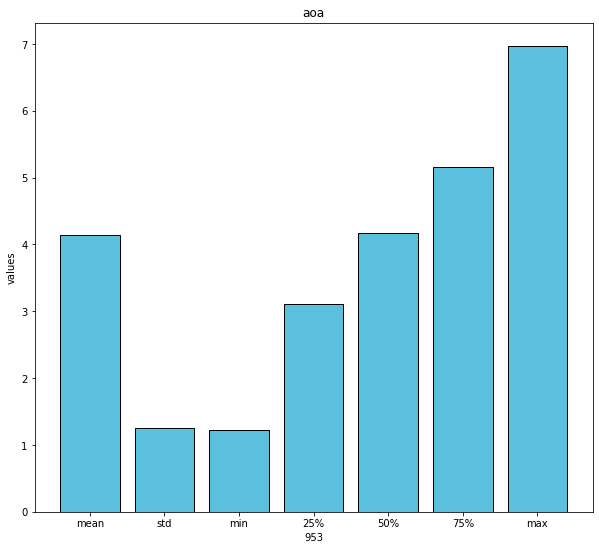

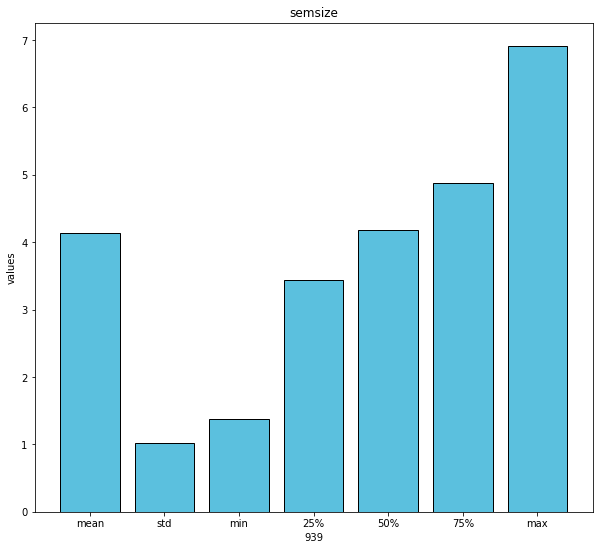

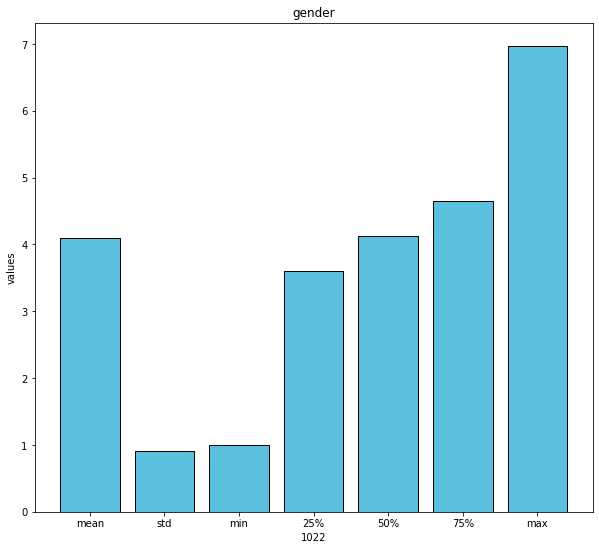

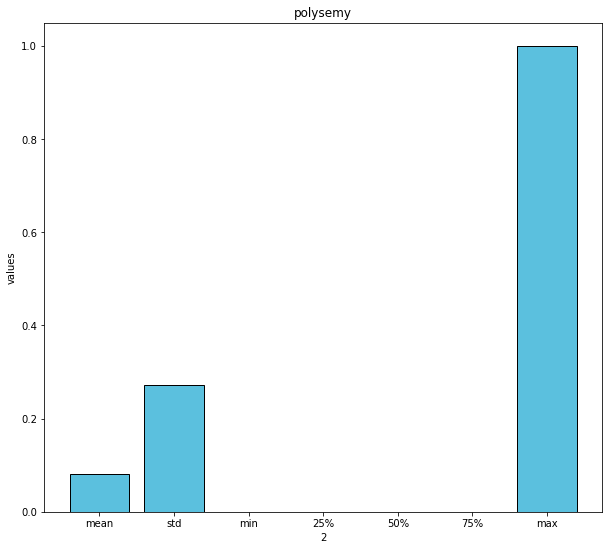

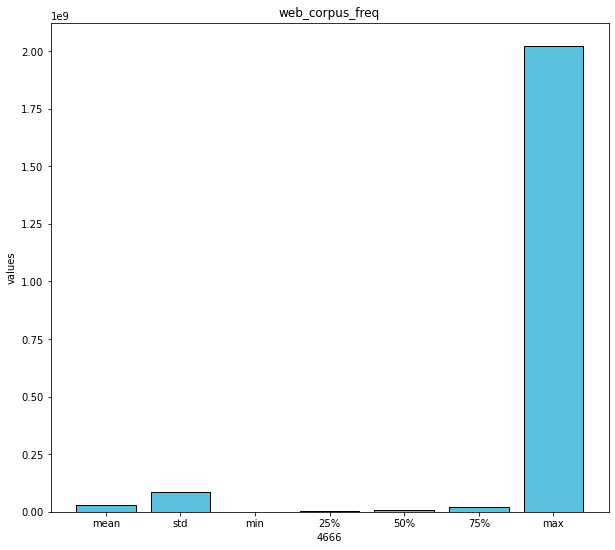

In [79]:
for item in df_columns_list:
    if item != 'word':
        desc = df[item].describe()
        desc_dict = desc.to_dict()
        #desc_count = desc_dict['count']
        count = df[item].unique().shape[0]
        del desc_dict['count']
        plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = '#5bc0de', edgecolor = 'k')
        plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
        plt.title(item)
        plt.xlabel(count)
        plt.ylabel('values')
        plt.show()
    
#desc = df[item].describe().plot()
#desc.plot()

## Distribution of the variables and statistics 
 * Explore (single, pairs of…) variables quantitatively (e.g., statistics, distributions); 


## Categorical Attributes

### 'Polysemy' 

'Polysemy' is a boolean attribute which give us only two values demonstrating if the word has one or several meanings,  respectively showing 0 or 1.

In [80]:
df.polysemy.describe()

count    4682.000000
mean        0.080948
std         0.272785
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: polysemy, dtype: float64

Text(0, 0.5, 'Value Range')

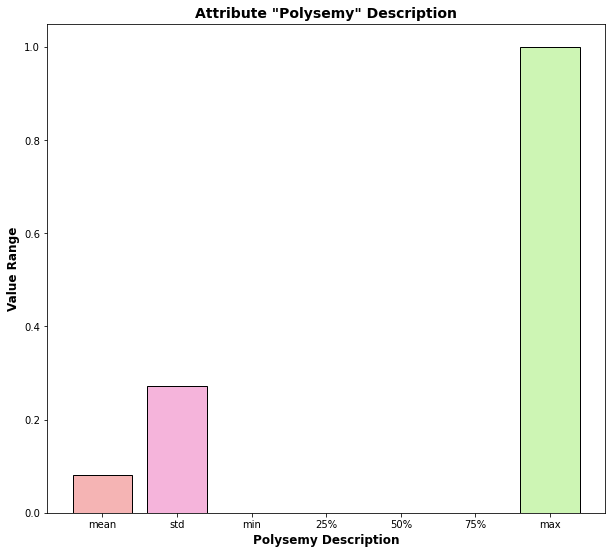

In [81]:
desc = df.polysemy.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
plt.title('Attribute "Polysemy" Description', fontweight='bold', fontsize = 14)
plt.xlabel('Polysemy Description',fontweight='bold', fontsize = 12)
plt.ylabel('Value Range', fontweight='bold', fontsize = 12)

In [82]:
df.polysemy.value_counts()

0    4303
1     379
Name: polysemy, dtype: int64

In [83]:
df[df['polysemy'] == 1].polysemy.value_counts().values[0]

379

In [119]:
df.groupby('polysemy').mean()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,web_corpus_freq
polysemy,,,,,,,,,,,
0,6.48594,4.706195,5.077020,5.030578,4.517969,4.680850,5.242439,4.209967,4.176742,4.093239,2.734432e+07
1,4.78628,4.359491,5.197797,5.207989,5.114697,5.201778,5.599404,3.387963,3.678414,4.175937,5.869549e+07


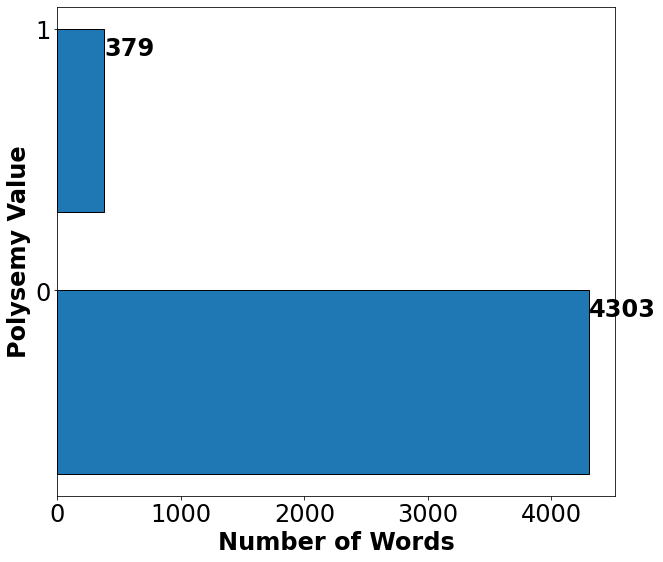

In [85]:
x = [u'0', u'1']
y = [df[df['polysemy'] == 0].polysemy.value_counts().values[0], df[df['polysemy'] == 1].polysemy.value_counts().values[0]]

fig, ax = plt.subplots()    
width = 0.70 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width,  edgecolor = 'k')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
#plt.title('Polysemy', fontweight='bold', fontsize = 15)
plt.xlabel('Number of Words', fontweight='bold', fontsize = 24)
plt.ylabel('Polysemy Value', fontweight='bold', fontsize = 24)    
plt.xticks( fontsize = 24)
plt.yticks(fontsize = 24) 
#plt.show()
#plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') 
# use format='svg' or 'pdf' for vectorial pictures
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='k', fontweight='bold', fontsize =24)

In [86]:
#poly_plot = df['polysemy'].value_counts().plot.bar(
#    #kind='bar'
#     title='Bar chart of attribute Polysemy' 
#    , edgecolor='k'
#    , color=light_colors_list[3]
#    , xlabel='Polysemy'
#    , ylabel='Number of Words'
#    , fontsize = 14
#)
# 
#poly_plot.plot()

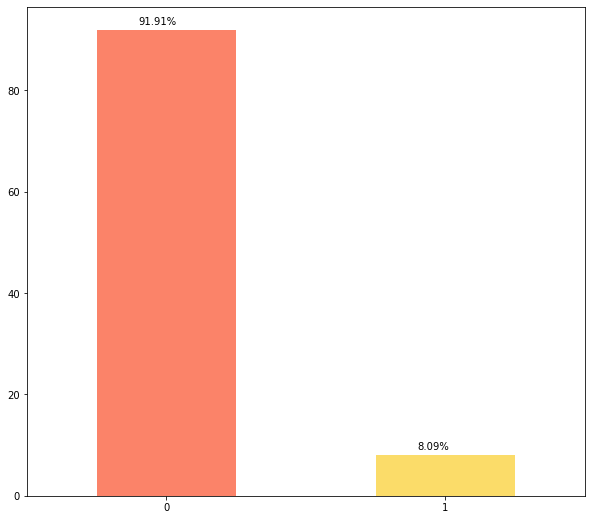

In [87]:
ax = (df.polysemy.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0, color=colors_list)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), color='black')

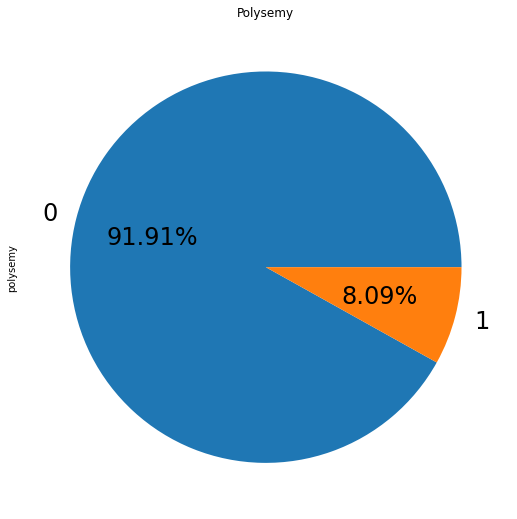

In [88]:
df['polysemy'].value_counts().plot(kind='pie', y='count', #figsize=(9,9),
                                title='Polysemy', 
                                #autopct='%1.0f%%',
                                autopct = "%.2f%%",
                                fontsize = 24, 
                               
                                )


plt.show()

#df.plot(kind='pie', y='count',figsize=(15,15), fontsize = 14,colors = colors)

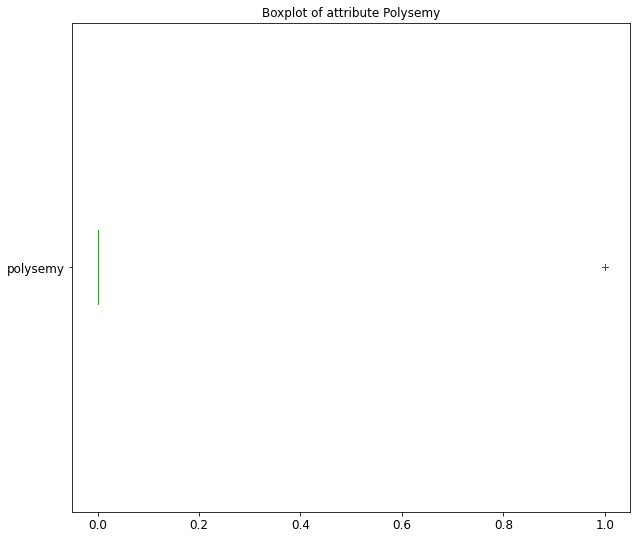

In [89]:
df['polysemy'].plot(kind='box', 
                 title='Boxplot of attribute Polysemy', 
                 sym="r+", 
                 fontsize = 12, 
                 vert = False)
plt.show()

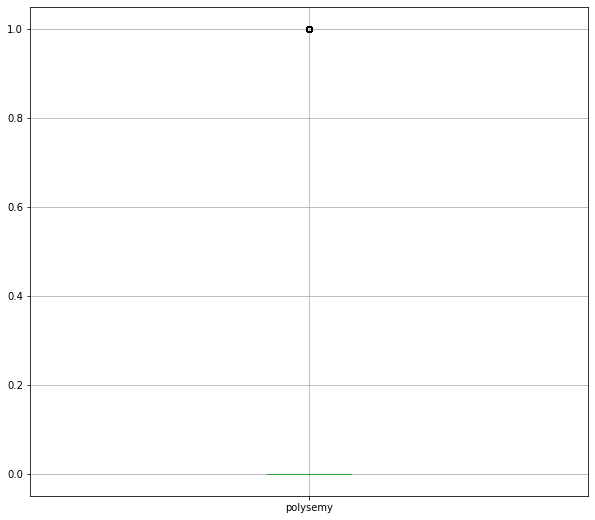

In [90]:
boxplot = df.boxplot(column=['polysemy'])

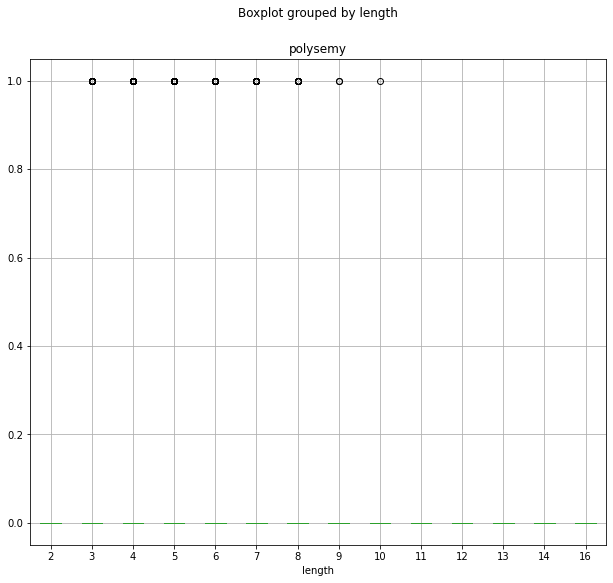

In [91]:
boxplot = df.boxplot(column=['polysemy'], by='length')

### 'Length'

In [92]:
df.length.describe()

count    4682.000000
mean        6.348355
std         2.006230
min         2.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        16.000000
Name: length, dtype: float64

Text(0, 0.5, 'Value Range')

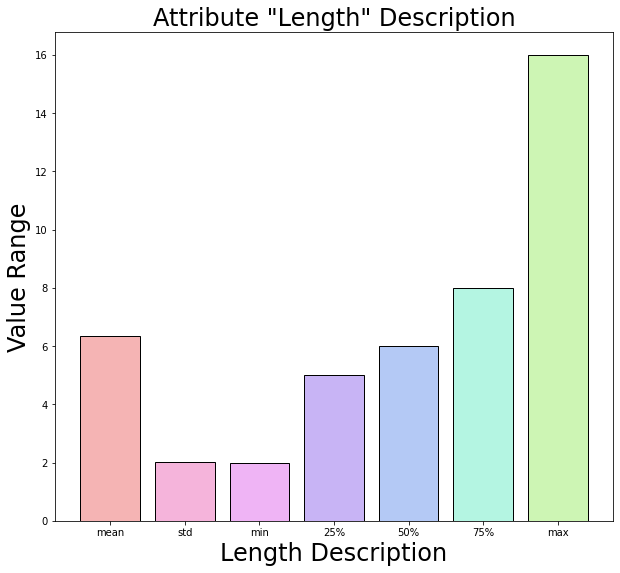

In [93]:
desc = df.length.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
plt.title('Attribute "Length" Description', fontsize=24)
plt.xlabel('Length Description', fontsize = 24)
plt.ylabel('Value Range', fontsize = 24)

In [94]:
type(df['length'].values)

numpy.ndarray

In [95]:
# Number of unique values
df.length.nunique()

14

In [96]:
df.length.value_counts()

5     912
6     910
7     777
4     732
8     492
9     316
10    221
3     157
11    108
12     39
13     11
14      4
2       2
16      1
Name: length, dtype: int64

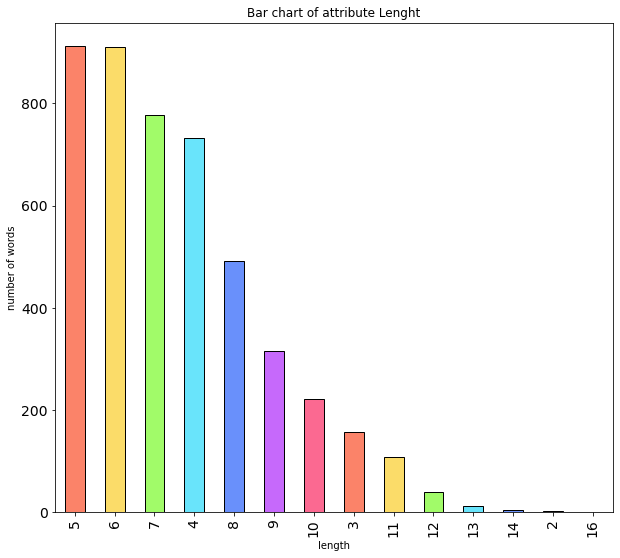

In [97]:
df['length'].value_counts().plot(kind='bar', 
                                title='Bar chart of attribute Lenght', 
                                color=colors_list, 
                                edgecolor='k', 
                                xlabel = 'length', 
                                ylabel = 'number of words', 
                                fontsize = 14
                                )

plt.show()

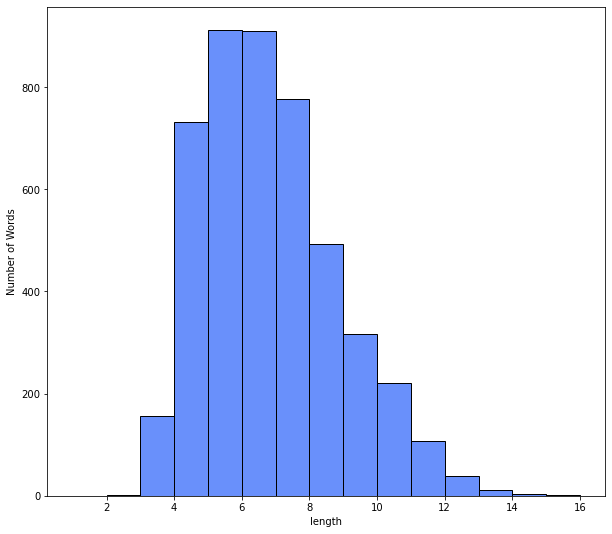

In [98]:
plt.hist(df['length'], edgecolor='k', color = colors_list[4], bins=np.arange(1,17, 1))
plt.xlabel('length')
plt.ylabel('Number of Words')
plt.show()

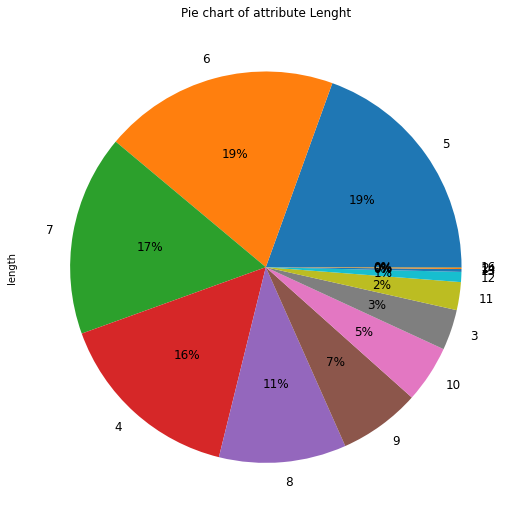

In [99]:
df['length'].value_counts().plot(kind='pie', 
                                title='Pie chart of attribute Lenght', 
                                autopct='%1.0f%%',
                                fontsize = 12
                                )
plt.show()

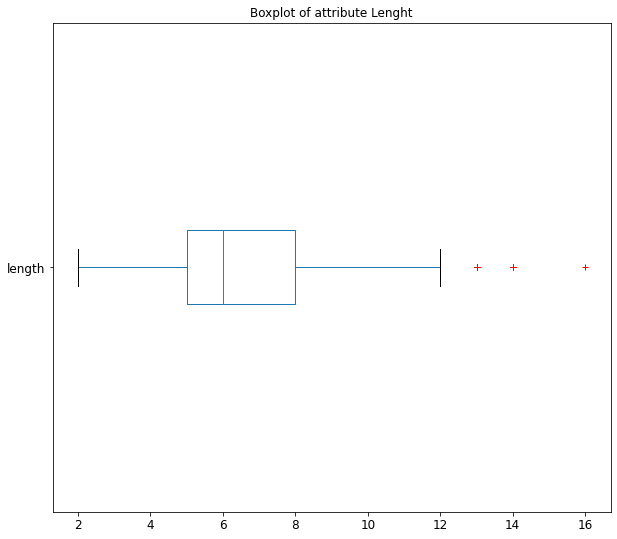

In [100]:
df['length'].plot(kind='box', 
                 title='Boxplot of attribute Lenght', 
                 sym="r+", 
                 fontsize = 12, 
                 vert = False)
plt.show()

In [101]:
# No missing values
df.length.isna().any() 

False

In [102]:
# outliers
df[df['length'] > 12]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
766,circumstances,13,4.500,4.485,3.424,2.938,2.563,5.879,4.788,4.849,4.032,0,23915696.0
863,communication,13,5.200,7.400,6.029,3.824,4.200,6.147,4.457,5.412,3.486,0,64378554.0
894,condescending,13,4.531,1.970,3.273,2.969,3.094,4.839,6.273,3.839,4.241,0,303986.0
1180,determination,13,7.235,8.029,7.500,2.242,3.000,5.839,5.059,5.875,4.161,0,17237730.0
1407,embarrassment,13,4.849,2.258,2.882,3.065,4.094,6.030,4.000,5.514,3.441,0,1242414.0
1946,hallucination,13,5.059,3.706,3.265,3.382,4.000,5.029,5.824,5.235,3.912,0,223597.0
2150,impressionism,13,4.345,5.710,4.636,2.250,3.000,3.057,6.333,4.563,4.059,0,544835.0
2228,intercontinental,16,5.353,5.647,5.364,3.688,2.882,3.000,5.882,5.382,4.212,0,2681202.0
2241,investigation,13,5.219,4.235,4.727,3.727,4.147,5.576,5.118,5.121,4.606,0,24399851.0
2655,misconception,13,3.906,3.281,3.667,2.156,1.929,4.438,6.333,4.258,4.000,0,561546.0


### 'Polysemy' & 'Length'

In [103]:
length_poly_crosstab = pd.crosstab(df['length'], df['polysemy'])
length_poly_crosstab

polysemy,0,1
length,,
2,2,0
3,120,37
4,592,140
5,794,118
6,860,50
7,754,23
8,484,8
9,314,2
10,220,1


<AxesSubplot:>

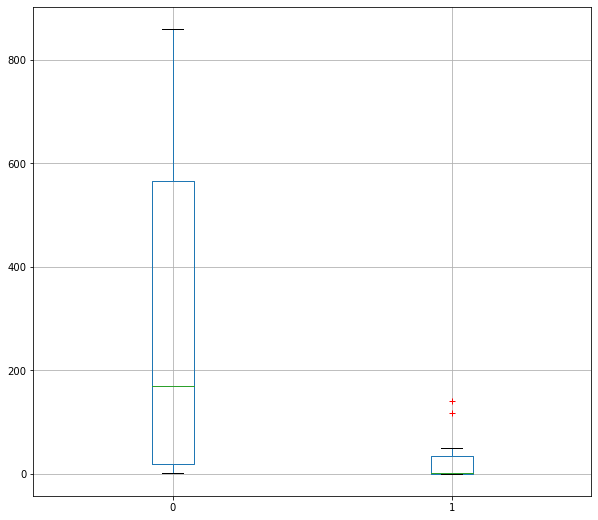

In [104]:
length_poly_crosstab.boxplot(sym="r+")

In [48]:
length_poly_crosstab.plot(kind='bar', stacked=True, 
            color = colors_list
              )
plt.title('Length by Polysemy', fontsize = 24)
plt.xlabel('Length', fontsize =24)
plt.ylabel('Number of words', fontsize=24)
plt.show()

NameError: name 'length_poly_crosstab' is not defined

In [58]:
# normalizing
length_poly_crosstab_norm = length_poly_crosstab.div(length_poly_crosstab.sum(1).astype(float), axis=0)
length_poly_crosstab_norm

polysemy,0,1
length,,
2,1.000000,0.000000
3,0.764331,0.235669
4,0.808743,0.191257
5,0.870614,0.129386
6,0.945055,0.054945
7,0.970399,0.029601
8,0.983740,0.016260
9,0.993671,0.006329
10,0.995475,0.004525


<AxesSubplot:>

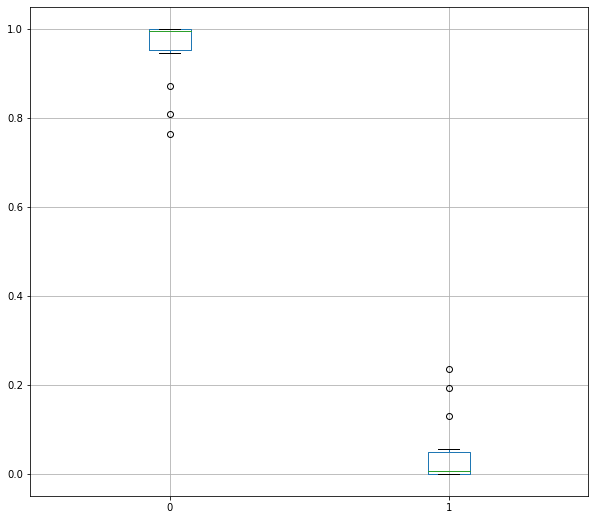

In [59]:
length_poly_crosstab_norm.boxplot()

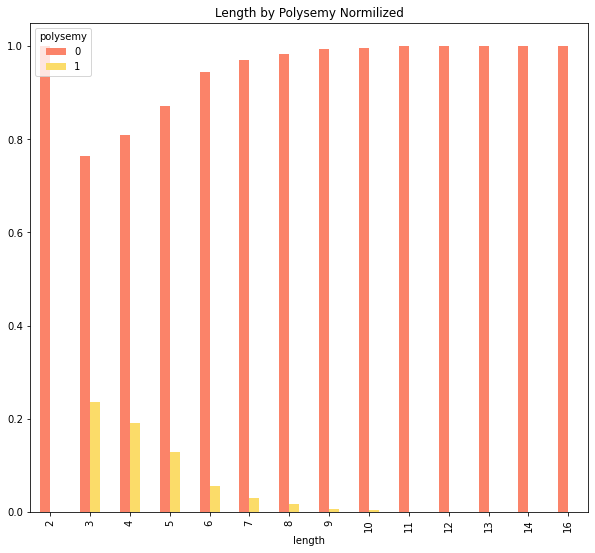

In [60]:
length_poly_crosstab_norm.plot(kind='bar', 
                               title='Length by Polysemy Normilized',
                              color=colors_list)
plt.xlabel('length')
plt.show()

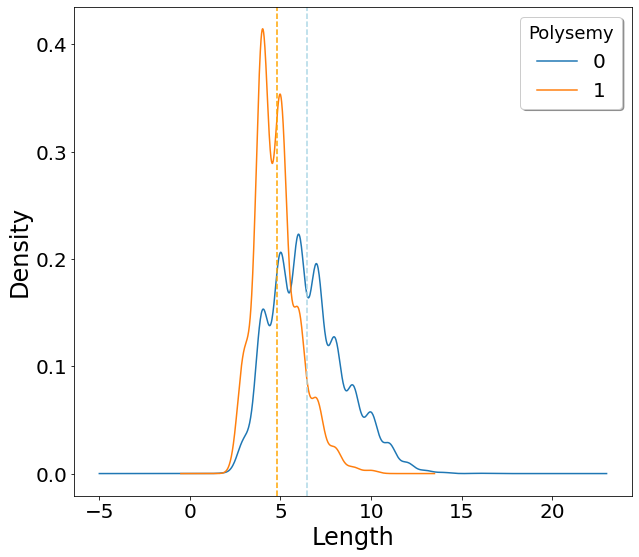

In [145]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['length'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Length', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(6.48594, color = "lightblue", linestyle='--')
plt.axvline(4.78628, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

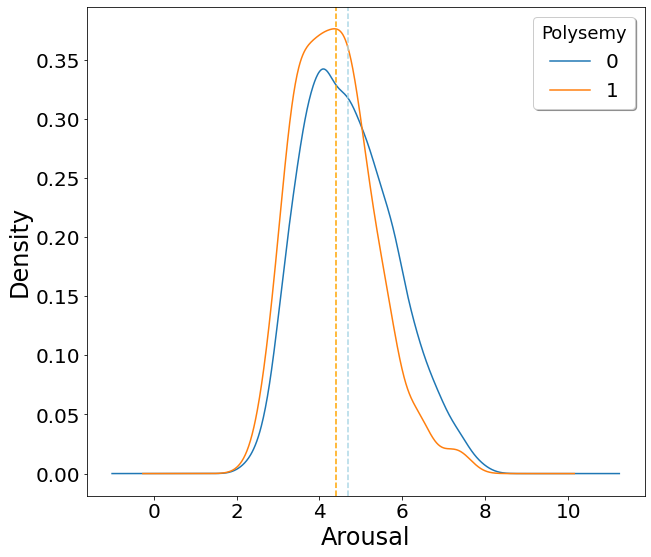

In [147]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['arousal'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Arousal', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(4.7, color = "lightblue", linestyle='--')
plt.axvline(4.4, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

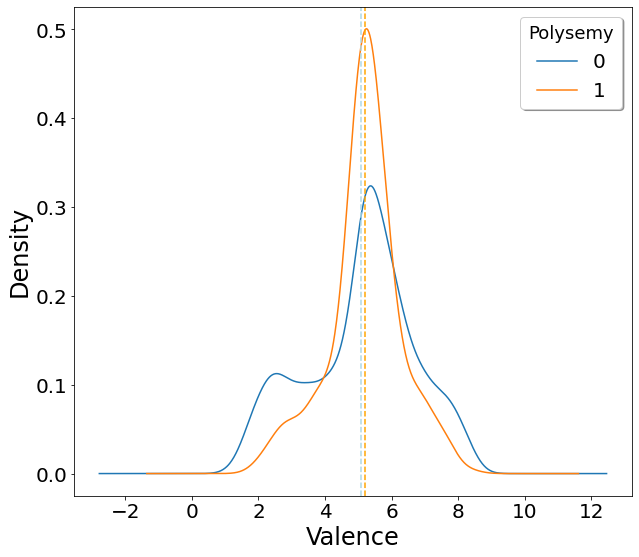

In [148]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['valence'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Valence', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(5.07, color = "lightblue", linestyle='--')
plt.axvline(5.19, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

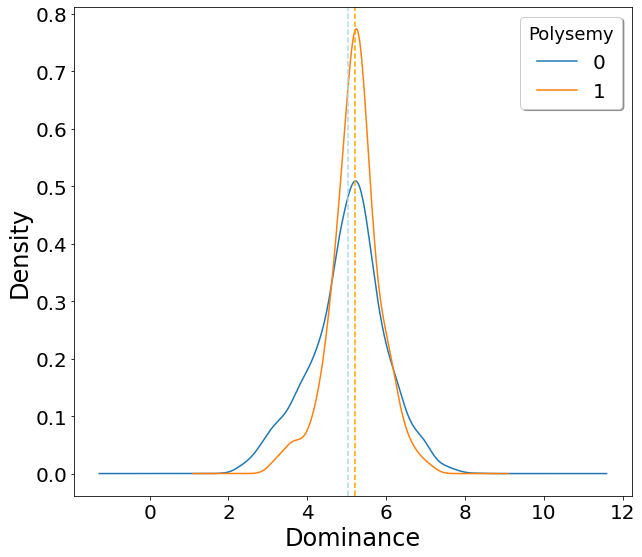

In [149]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['dominance'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Dominance', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(5.03, color = "lightblue", linestyle='--')
plt.axvline(5.2, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

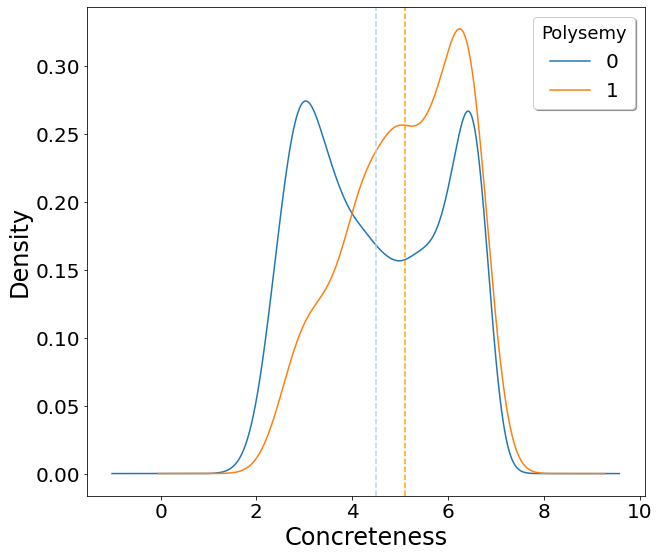

In [150]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['concreteness'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Concreteness', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(4.5, color = "lightblue", linestyle='--')
plt.axvline(5.11, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

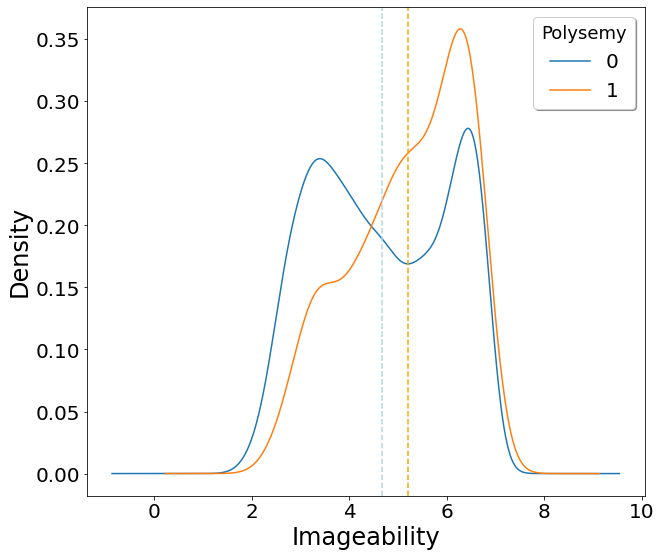

In [151]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['imageability'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Imageability', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(4.68, color = "lightblue", linestyle='--')
plt.axvline(5.2, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

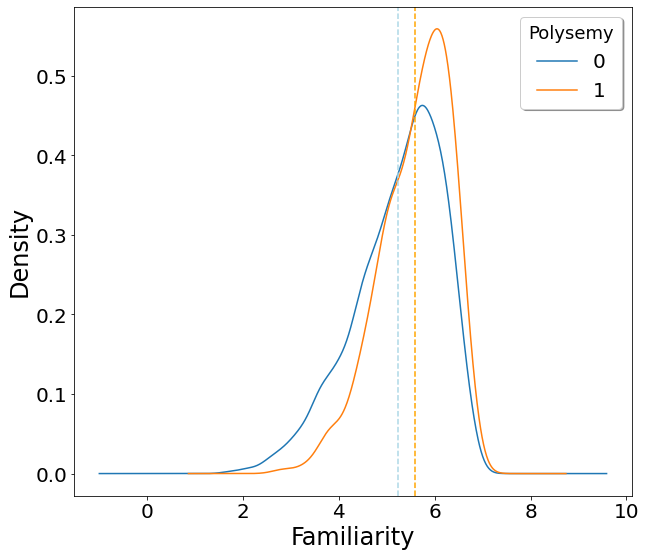

In [152]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['familiarity'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Familiarity', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(5.24, color = "lightblue", linestyle='--')
plt.axvline(5.59, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

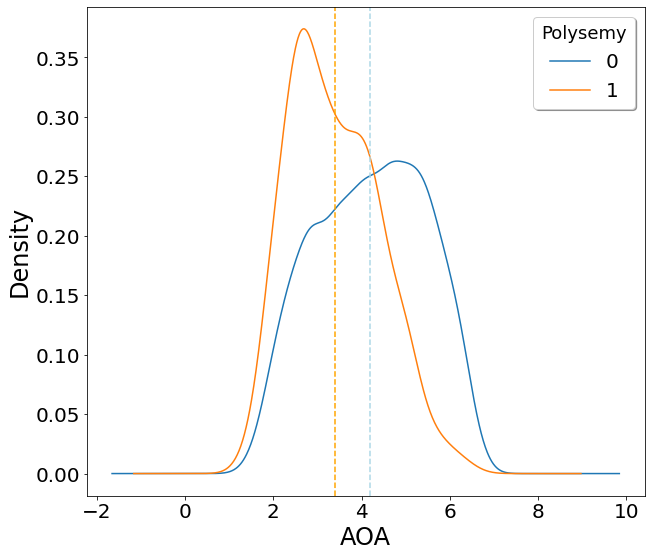

In [153]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['aoa'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('AOA', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(4.2, color = "lightblue", linestyle='--')
plt.axvline(3.39, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

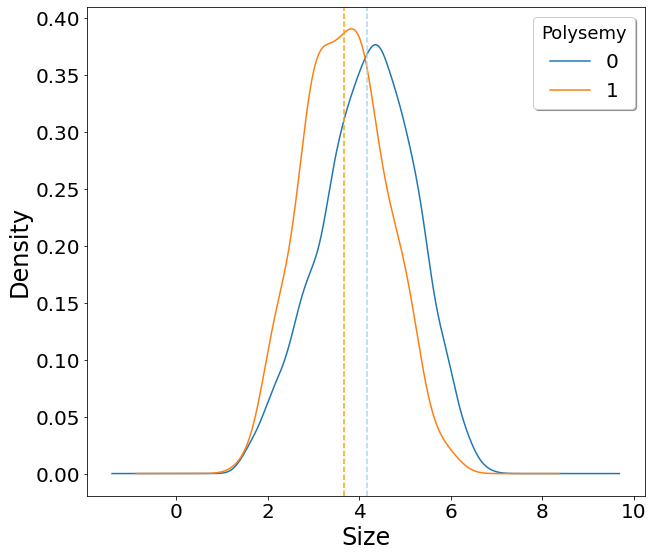

In [154]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['semsize'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Size', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(4.18, color = "lightblue", linestyle='--')
plt.axvline(3.67, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

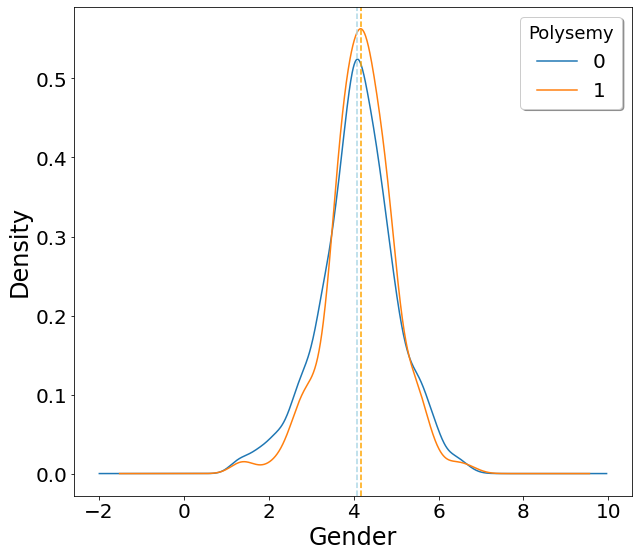

In [155]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['gender'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Gender', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(4.09, color = "lightblue", linestyle='--')
plt.axvline(4.18, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

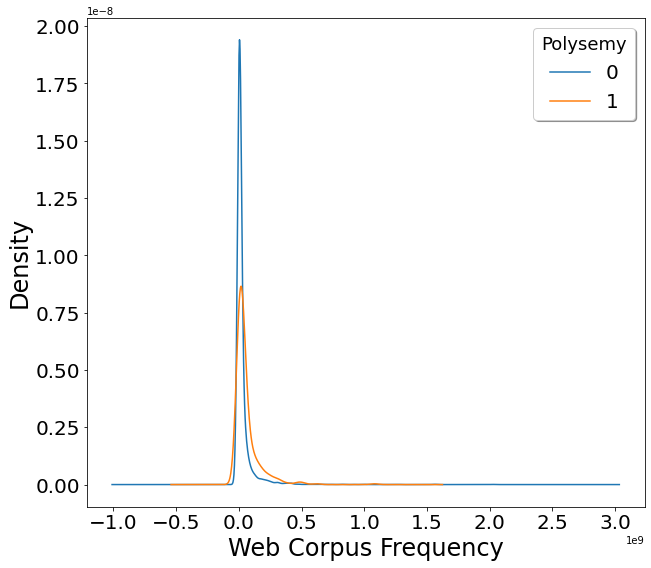

In [157]:
poly_values = sorted(df['polysemy'].unique())
for val in poly_values:
    df[df.polysemy == val]['web_corpus_freq'].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
#plt.title('Density Plot by Polysemy', fontsize =24)
plt.xlabel('Web Corpus Frequency', fontsize = 24)
plt.ylabel('Density', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.axvline(4.2, color = "lightblue", linestyle='--')
#plt.axvline(3.39, color = "orange", linestyle='--')
legend = plt.legend(('0', '1'), loc='best', fontsize = 20, fancybox=True,shadow=True)
legend.set_title("Polysemy", prop={'size':18})
plt.show()

In [62]:
df[['arousal', 'length', 'valence']]

,arousal,length,valence
0,4.200,8,2.864
1,3.125,5,5.781
2,3.273,10,5.250
3,4.194,8,3.767
4,3.846,10,3.880
...,...,...,...
4677,6.185,8,5.000
4678,4.031,4,4.182
4679,5.969,4,6.818
4680,5.909,3,6.235


Text(0.5, 1.0, 'Length by Polysemy')

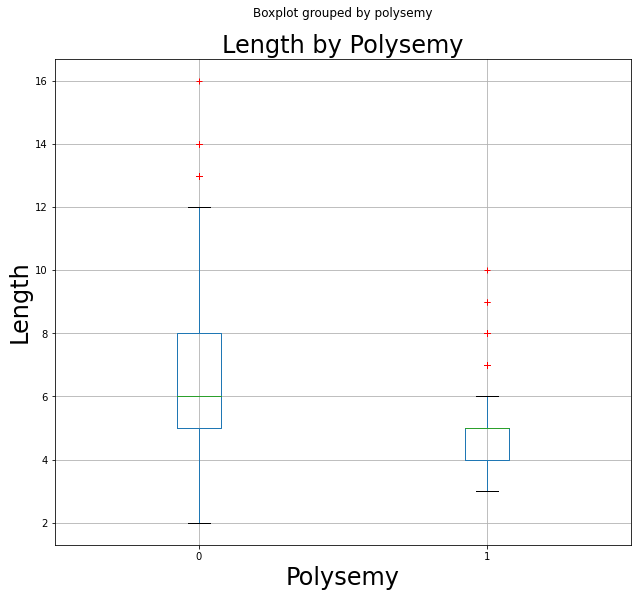

In [63]:
df.boxplot(column=['length'],
                     sym="r+", 
                     by='polysemy')
plt.xlabel('Polysemy', fontsize = 24)
plt.ylabel('Length', fontsize = 24)
plt.title('Length by Polysemy', fontsize = 24)

### 'Arousal'

In [64]:
df.length.describe()

count    4682.000000
mean        6.348355
std         2.006230
min         2.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        16.000000
Name: length, dtype: float64

Text(0, 0.5, 'Value Range')

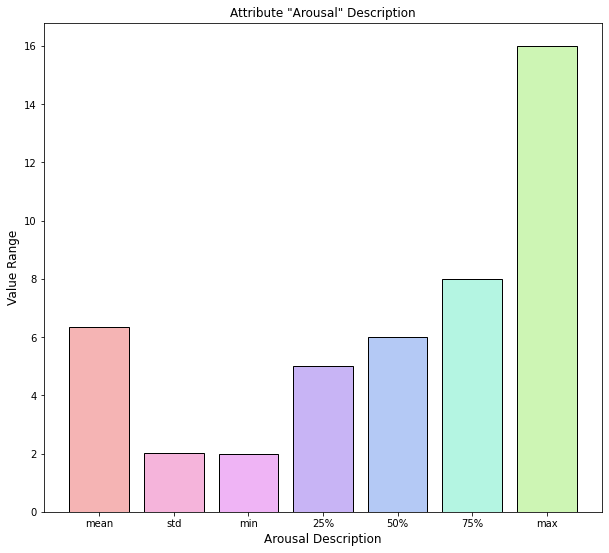

In [65]:
desc = df.length.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
plt.title('Attribute "Arousal" Description')
plt.xlabel('Arousal Description', fontsize = 12)
plt.ylabel('Value Range', fontsize = 12)

In [66]:
type(df['arousal'].values)

numpy.ndarray

In [67]:
df.arousal.nunique()

964

In [68]:
df.arousal.value_counts()

4.000    42
5.000    37
4.500    32
3.000    25
4.059    21
         ..
5.107     1
3.300     1
3.074     1
7.941     1
6.543     1
Name: arousal, Length: 964, dtype: int64

In [69]:
# mean value of Arousal
df['arousal'].mean()

4.678129431866692

In [70]:
df['arousal'].median()

4.571

In [71]:
df['arousal'].std()

1.0971633921099333

In [72]:
df_ar = df[df['arousal'] < (df['arousal'].std() + df['arousal'].mean())]
df_ar

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,youth,5,5.548,6.563,5.219,3.677,4.355,5.929,4.156,4.094,3.742,0,51426255.0
4675,zebra,5,4.818,5.939,5.406,6.807,6.813,5.192,2.818,4.147,4.129,0,2902469.0
4676,zephyr,6,4.667,5.200,4.643,3.813,3.357,1.647,6.778,3.929,4.467,0,1334891.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0


In [73]:
# 68% of the values
df_ar1 = df_ar[df_ar['arousal'] > (df['arousal'].mean() - df['arousal'].std())] 
df_ar1

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,1490684.0
6,abdominal,9,3.875,5.212,4.667,5.735,5.030,4.807,5.706,3.788,4.242,0,3090148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,youth,5,5.548,6.563,5.219,3.677,4.355,5.929,4.156,4.094,3.742,0,51426255.0
4675,zebra,5,4.818,5.939,5.406,6.807,6.813,5.192,2.818,4.147,4.129,0,2902469.0
4676,zephyr,6,4.667,5.200,4.643,3.813,3.357,1.647,6.778,3.929,4.467,0,1334891.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0


In [74]:
arousal_lt_mean = df[df['arousal'] < df['arousal'].mean()]
arousal_lt_mean

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4669,yoga,4,4.235,6.563,5.970,5.324,6.177,5.727,5.235,3.406,2.147,0,14660956.0
4670,yolk,4,4.121,5.194,5.182,6.267,6.438,4.900,3.219,2.161,3.586,0,451960.0
4676,zephyr,6,4.667,5.200,4.643,3.813,3.357,1.647,6.778,3.929,4.467,0,1334891.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0


In [75]:
arousal_mt_mean = df[df['arousal'] > df['arousal'].mean()]
arousal_mt_mean

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,1490684.0
8,abducted,8,5.344,1.969,2.871,4.813,4.212,5.406,5.290,5.161,4.546,0,837949.0
9,abduction,9,5.324,1.618,2.886,4.912,4.800,4.441,5.114,5.059,4.686,0,1188510.0
10,aberration,10,4.852,3.269,4.852,3.208,2.840,2.485,6.414,4.720,4.320,0,443062.0
12,ability,7,5.471,6.912,6.971,2.941,2.515,6.000,4.061,5.029,4.206,0,52004289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,zeal,4,5.913,6.429,6.174,2.947,2.826,2.688,5.917,4.474,3.909,0,1084831.0
4675,zebra,5,4.818,5.939,5.406,6.807,6.813,5.192,2.818,4.147,4.129,0,2902469.0
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0


<AxesSubplot:>

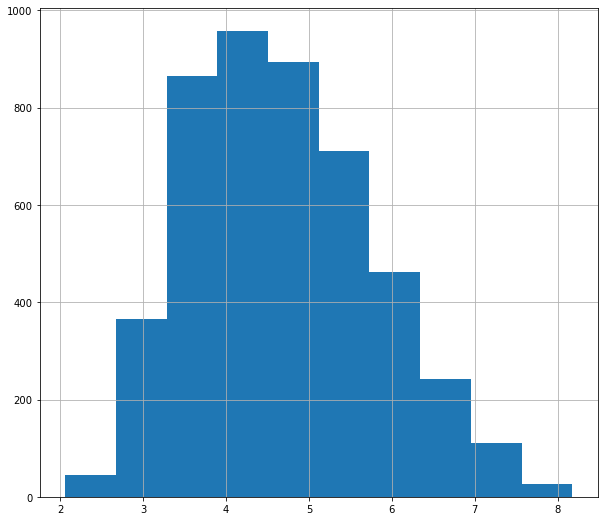

In [76]:
df.groupby(['word'])['arousal'].mean().hist()

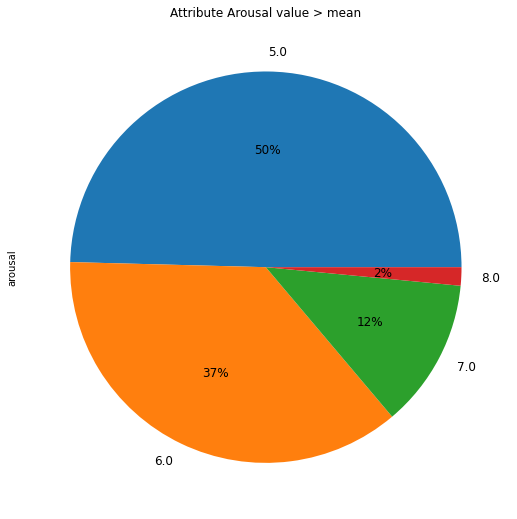

In [77]:
df['arousal'].where(df['arousal'] > df['arousal'].mean()).round(0).value_counts().plot(kind='pie', 
                                title='Attribute Arousal value > mean', 
                                autopct='%1.0f%%',
                                fontsize = 12
                                )
plt.show()

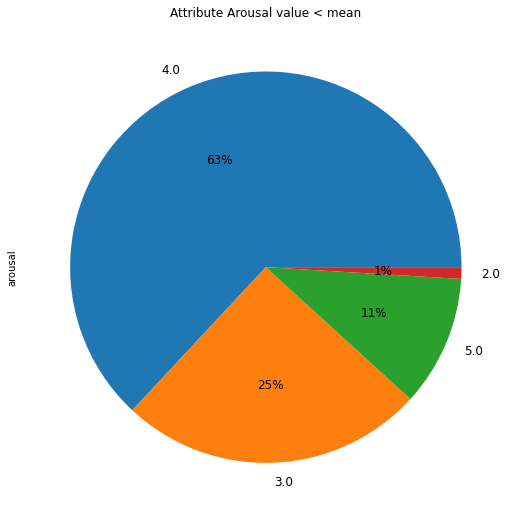

In [78]:
df['arousal'].where(df['arousal'] < df['arousal'].mean()).round(0).value_counts().plot(kind='pie', 
                                title='Attribute Arousal value < mean', 
                                autopct='%1.0f%%',
                                fontsize = 12
                                )
plt.show()

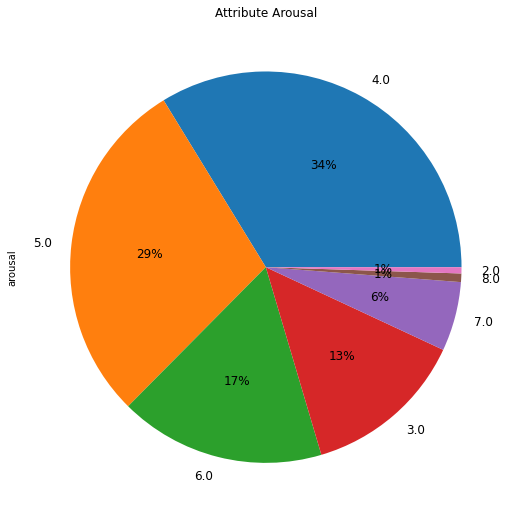

In [79]:
df['arousal'].round(0).value_counts().plot(kind='pie', 
                                title='Attribute Arousal', 
                                autopct='%1.0f%%',
                                fontsize = 12
                                )
plt.show()

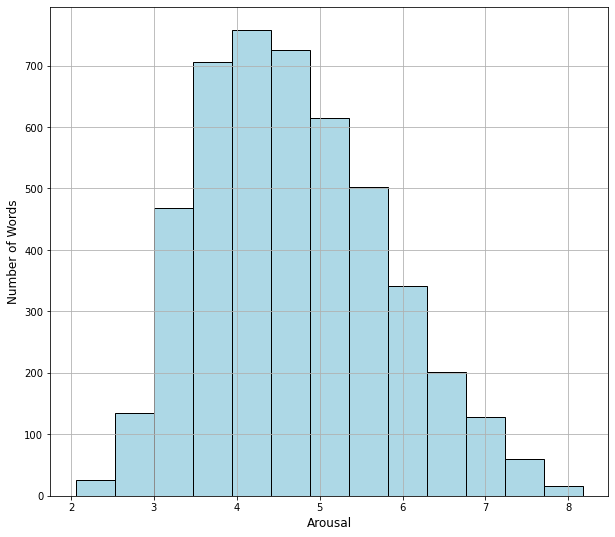

In [80]:
# Sturges' rule
# formula to find number of bins \log _2\left(4682\right)+1 = 13.1929 --> 13

df['arousal'].hist(bins=13, color = 'lightblue', edgecolor = 'k')
plt.xlabel('Arousal', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.show()

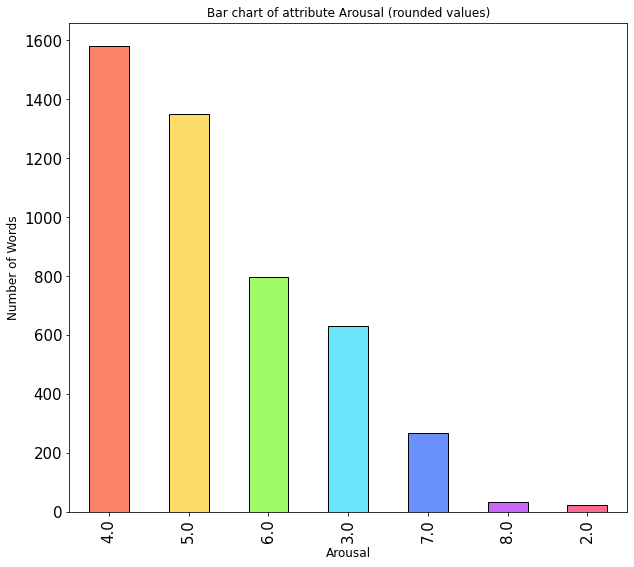

In [81]:
df['arousal'].round(0).value_counts().plot(kind='bar', 
                                title='Bar chart of attribute Arousal (rounded values)', 
                                color=colors_list, 
                                edgecolor='k', 
                                fontsize = 15
                                )
plt.xlabel('Arousal', fontsize = 12)
plt.ylabel('Number of Words', fontsize = 12)
plt.show()
#df['arousal'].round(1).nunique()

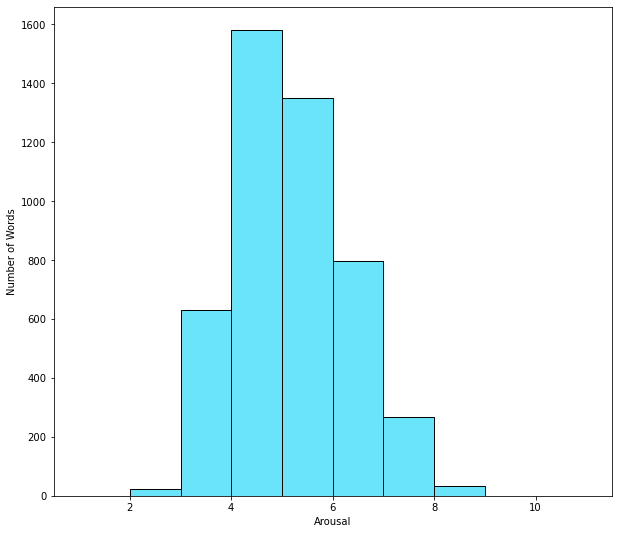

In [82]:
plt.hist(df['arousal'].round(0), edgecolor='k', color = colors_list[3], bins=np.arange(1, 12, 1))
plt.xlabel('Arousal')
plt.ylabel('Number of Words')
plt.show()

In [83]:
df['arousal'].max()

8.177

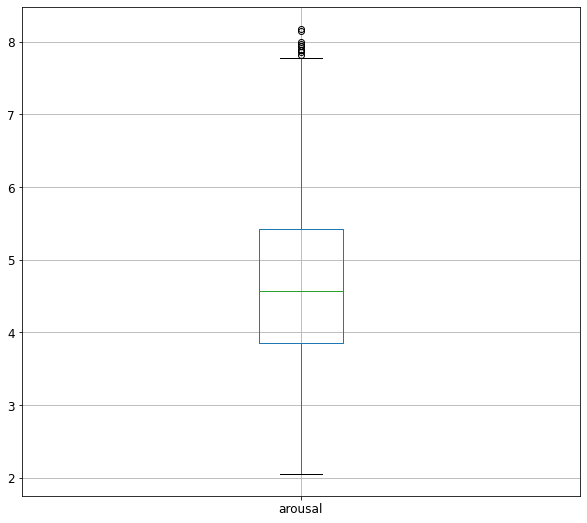

In [84]:
boxplot = df.boxplot(grid=True, rot=0, fontsize=12, column=['arousal'])

## Using Z-score to find outliers

In [8]:
df = pd.read_csv('words_glasgow.csv', index_col=0)
df.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [9]:
df_z_score = (df - df.mean())/ df.std()
df_z_score.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
abattoir,0.823258,-0.435787,-1.394176,-0.764976,0.619888,-0.243574,-3.136430,2.088630,0.503860,1.415189,-0.296748,-0.350167
abbey,-0.672084,-1.415586,0.435416,-0.406094,0.934461,0.455563,-2.113870,0.825030,0.962185,-0.873550,-0.296748,-0.302290
abbreviate,1.820153,-1.280693,0.102364,0.204219,-0.892992,-1.134184,-0.163191,1.117183,-1.435956,-0.141329,-0.296748,-0.350402
abdicate,0.823258,-0.441256,-0.827799,-0.672569,-0.836494,-1.619104,-1.411539,1.667962,0.530246,1.169654,-0.296748,-0.350590
abdication,1.820153,-0.758437,-0.756924,-0.263186,-0.888807,-1.578755,-2.360283,1.806854,0.925050,0.516355,-0.296748,-0.350543


In [10]:
df_z_score = df_z_score.drop(['length','polysemy', 'web_corpus_freq'], axis = 1)

In [88]:
#df_z_score.hist(density = True, bins = 20, sharey = True, figsize=(14,12), grid=False, edgecolor = 'k')
#plt.suptitle('Scaled PSY distributions')
#plt.show()

In [11]:
arousal_outliers = df[(df_z_score['arousal'] < -2.82) | (df_z_score['arousal'] > 2.82)]
arousal_outliers

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
adventure,9,7.853,7.971,7.313,2.912,4.743,5.576,2.941,6.118,4.794,0,34807033.0
aroused,7,7.943,7.265,5.667,2.677,4.147,5.758,6.171,4.941,4.229,0,851443.0
enthusiastic,12,7.882,8.314,6.938,3.324,4.636,6.000,4.829,5.441,3.206,0,3015772.0
erotic,6,7.879,7.182,6.273,3.029,4.794,5.324,6.265,5.065,3.156,0,17422865.0
euphoria,8,7.818,8.313,6.636,1.970,3.788,4.088,6.324,6.265,3.029,0,729486.0
excited,7,7.882,8.143,6.886,2.618,4.543,6.484,2.600,5.177,3.324,0,9611150.0
kiss,4,8.000,7.914,6.242,5.686,6.515,6.375,2.057,4.559,2.206,0,14790481.0
love,4,8.147,8.647,5.303,2.849,4.471,6.906,1.912,6.294,2.294,0,201063526.0
orgasm,6,7.941,8.200,6.324,5.029,5.265,5.727,6.500,5.171,3.057,0,5470251.0


<AxesSubplot:>

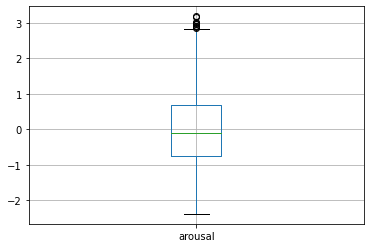

In [12]:
df_z_score.boxplot(column=['arousal']) #df.arou_zscore

In [91]:
#df_z_score.describe()

In [13]:
df_z_score.describe()

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
count,4.682000e+03,4.682000e+03,4.682000e+03,4.682000e+03,4.682000e+03,4.682000e+03,4.682000e+03,4.682000e+03,4.682000e+03
mean,2.889253e-14,3.901763e-15,3.939849e-14,7.285652e-15,1.213062e-14,5.185178e-14,4.808627e-15,3.068645e-15,7.454737e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.389006e+00,-2.544492e+00,-3.335169e+00,-2.043869e+00,-2.190591e+00,-3.934287e+00,-2.334369e+00,-2.698547e+00,-3.397959e+00
25%,-7.557028e-01,-6.095277e-01,-5.543745e-01,-9.236821e-01,-8.831037e-01,-6.136820e-01,-8.217211e-01,-6.825060e-01,-5.414196e-01
50%,-9.764219e-02,1.274523e-01,8.387582e-02,-6.645301e-02,-3.375951e-02,1.809185e-01,2.679871e-02,4.895622e-02,2.309221e-02
75%,6.752600e-01,6.279715e-01,5.964101e-01,9.797989e-01,9.602905e-01,7.573296e-01,8.050741e-01,7.286249e-01,6.095268e-01
max,3.189015e+00,2.233020e+00,3.573837e+00,1.654283e+00,1.627148e+00,1.810284e+00,2.257057e+00,2.712417e+00,3.147090e+00


In [93]:
#limit = {'limit': 0}
#df_z_score = df_z_score.append(limit, ignore_index = True)
#df_z_score

In [14]:
df_z_score.columns

Index(['arousal', 'valence', 'dominance', 'concreteness', 'imageability',
       'familiarity', 'aoa', 'semsize', 'gender'],
      dtype='object')

In [15]:
Limit_list =[]
for i in df_z_score.columns:
    limit = (df_z_score[i].mean()+df_z_score[i].quantile(0.75))+(1.5*(df_z_score[i].quantile(0.75)-df_z_score[i].quantile(0.25)))
    Limit_list.append(limit)
Limit_list

[2.8217042150665734,
 2.484220383800791,
 2.322587032469006,
 3.835020489702802,
 3.72538195713594,
 2.8138469277703546,
 3.2452669648707086,
 2.845321271256807,
 2.335946466064911]

In [17]:
outliers = df[
      (df_z_score[df_z_score.columns[0]] < -Limit_list[0]) | (df_z_score[df_z_score.columns[0]] > Limit_list[0])
    | (df_z_score[df_z_score.columns[1]] < -Limit_list[1]) | (df_z_score[df_z_score.columns[1]] > Limit_list[1])
    | (df_z_score[df_z_score.columns[2]] < -Limit_list[2]) | (df_z_score[df_z_score.columns[2]] > Limit_list[2])
    | (df_z_score[df_z_score.columns[3]] < -Limit_list[3]) | (df_z_score[df_z_score.columns[3]] > Limit_list[3])
    | (df_z_score[df_z_score.columns[4]] < -Limit_list[4]) | (df_z_score[df_z_score.columns[4]] > Limit_list[4])
    | (df_z_score[df_z_score.columns[5]] < -Limit_list[5]) | (df_z_score[df_z_score.columns[5]] > Limit_list[5])
    | (df_z_score[df_z_score.columns[6]] < -Limit_list[6]) | (df_z_score[df_z_score.columns[6]] > Limit_list[6])
    | (df_z_score[df_z_score.columns[7]] < -Limit_list[7]) | (df_z_score[df_z_score.columns[7]] > Limit_list[7])
    | (df_z_score[df_z_score.columns[8]] < -Limit_list[8]) | (df_z_score[df_z_score.columns[8]] > Limit_list[8])
    ]
outliers

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
abducted,8,5.344,1.969,2.871,4.813,4.212,5.406,5.290,5.161,4.546,0,837949.0
aberration,10,4.852,3.269,4.852,3.208,2.840,2.485,6.414,4.720,4.320,0,443062.0
abuse,5,4.879,1.563,2.500,3.419,3.909,5.303,5.177,4.743,5.061,0,36269685.0
aches,5,4.063,2.871,2.813,3.813,3.219,5.655,4.000,3.968,3.867,0,1116644.0
...,...,...,...,...,...,...,...,...,...,...,...,...
woman,5,5.719,6.939,6.333,6.515,6.606,6.697,2.000,4.606,1.314,0,70613606.0
womb,4,4.265,6.235,4.441,6.235,5.394,5.294,5.273,3.424,1.235,0,1173095.0
women,5,5.200,6.971,6.235,6.412,6.371,6.515,2.457,4.515,1.114,0,242520455.0


In [276]:
outliers[outliers['polysemy'] == 1]

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
bridal,6,5.364,6.807,5.250,4.394,5.455,4.966,4.121,4.375,1.258,1,8466303.0
cock,4,6.585,5.046,5.984,6.288,6.302,5.787,5.227,3.866,6.391,1,37573028.0
cowboy,6,4.853,5.471,5.735,6.177,6.667,5.000,2.677,3.647,6.324,1,6868615.0
dress,5,5.629,6.371,5.879,6.611,6.727,6.710,2.028,3.265,1.472,1,27318959.0
father,6,4.667,6.657,4.636,6.000,6.412,5.969,1.912,4.857,6.788,1,48580528.0
groom,5,4.719,6.294,5.273,5.647,5.886,4.971,4.091,4.059,6.571,1,2637912.0
queen,5,4.906,5.576,4.656,5.552,6.065,5.633,2.667,4.781,1.313,1,32366847.0
skirt,5,5.061,5.909,5.515,6.879,6.688,6.484,2.303,2.969,1.618,1,9981485.0


In [18]:
outliers.isnull().sum()

length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    5
dtype: int64

In [19]:
#df_new.csv
df_new = pd.read_csv('df_new.csv', index_col=0)
df_new.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


<AxesSubplot:>

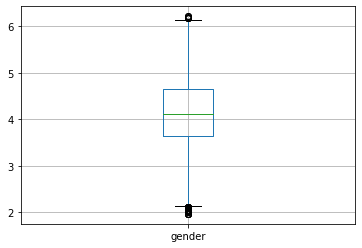

In [24]:
df_new.boxplot(column=['gender']) 

### Finding outliers for AROUSAL

In [100]:
arousal_box_len = 5.419 - 3.849
arousal_top = arousal_box_len * 1.5+ 5.419
arousal_bottom = 3.849 - arousal_box_len * 1.5
arousal_bottom

1.494000000000001

In [101]:
arousal_top

7.773999999999999

In [102]:
df[df['arousal'] == arousal_top]

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,


In [103]:
df[df['arousal'] > arousal_top].arousal.sort_values()

word
euphoria        7.818
adventure       7.853
erotic          7.879
enthusiastic    7.882
excited         7.882
orgasm          7.941
aroused         7.943
spectacular     7.970
kiss            8.000
love            8.147
passionate      8.177
Name: arousal, dtype: float64

In [104]:
# nearest 7.818
# outliers for arousal 
df_arousal_outliers = df[df['arousal'] > 7.818]
df_arousal_outliers

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
adventure,9,7.853,7.971,7.313,2.912,4.743,5.576,2.941,6.118,4.794,0,34807033.0
aroused,7,7.943,7.265,5.667,2.677,4.147,5.758,6.171,4.941,4.229,0,851443.0
enthusiastic,12,7.882,8.314,6.938,3.324,4.636,6.000,4.829,5.441,3.206,0,3015772.0
erotic,6,7.879,7.182,6.273,3.029,4.794,5.324,6.265,5.065,3.156,0,17422865.0
excited,7,7.882,8.143,6.886,2.618,4.543,6.484,2.600,5.177,3.324,0,9611150.0
kiss,4,8.000,7.914,6.242,5.686,6.515,6.375,2.057,4.559,2.206,0,14790481.0
love,4,8.147,8.647,5.303,2.849,4.471,6.906,1.912,6.294,2.294,0,201063526.0
orgasm,6,7.941,8.200,6.324,5.029,5.265,5.727,6.500,5.171,3.057,0,5470251.0
passionate,10,8.177,8.143,7.061,2.515,4.486,5.794,5.286,6.000,2.600,0,3759453.0


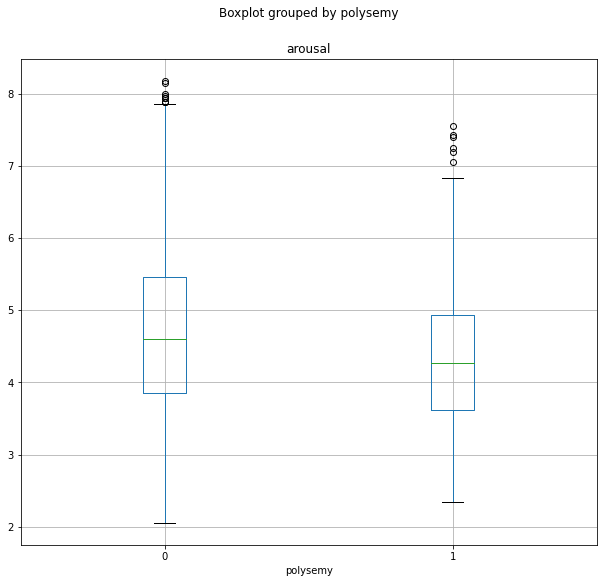

In [105]:
boxplot = df.boxplot(column=['arousal'], by='polysemy')

In [106]:
q = df['arousal'].quantile(0.99)
q

7.424

### 'Valence'

In [107]:
df.valence.describe()

count    4682.000000
mean        5.086797
std         1.594344
min         1.030000
25%         4.115000
50%         5.290000
75%         6.088000
max         8.647000
Name: valence, dtype: float64

Text(0, 0.5, 'Value Range')

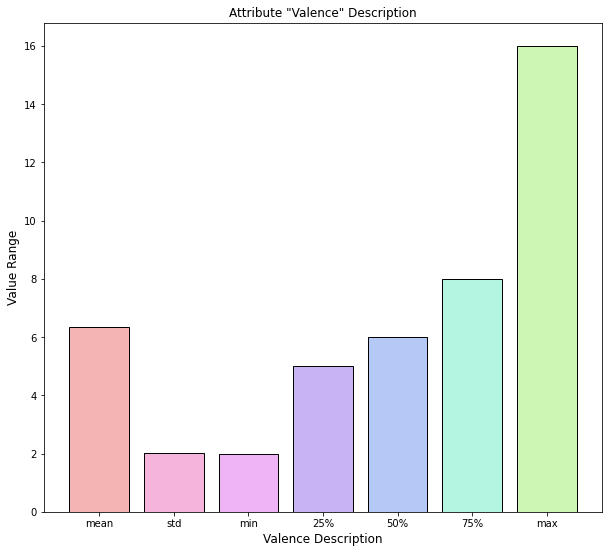

In [108]:
desc = df.length.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
plt.title('Attribute "Valence" Description')
plt.xlabel('Valence Description', fontsize = 12)
plt.ylabel('Value Range', fontsize = 12)

In [109]:
type(df['valence'].values)

numpy.ndarray

In [110]:
df.valence.nunique()

1219

In [111]:
df.valence.value_counts()

5.000    44
6.000    30
5.029    27
5.971    22
4.971    21
         ..
6.581     1
5.936     1
3.269     1
3.559     1
4.483     1
Name: valence, Length: 1219, dtype: int64

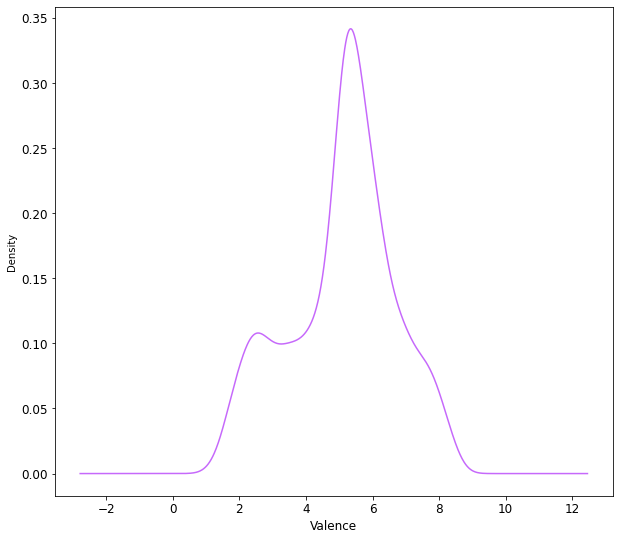

In [112]:
df.valence.plot(kind ='kde', 
               color=colors_list[5], 
               fontsize =12
               )
plt.xlabel('Valence', fontsize = 12)
plt.show()

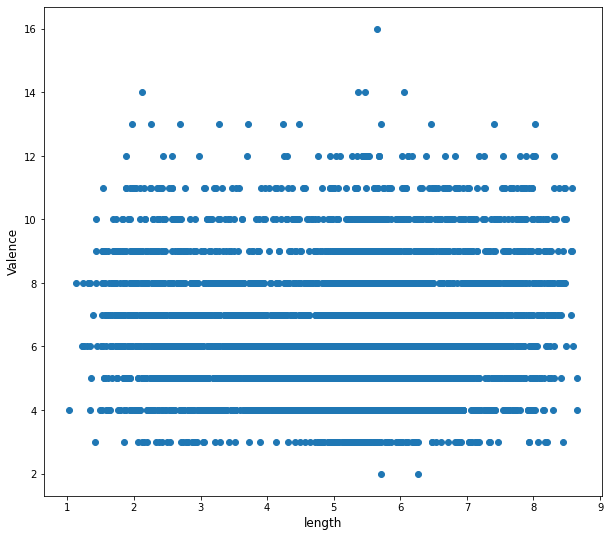

In [113]:
plt.scatter(df['valence'], df['length']) 
plt.xlabel('length', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.show()

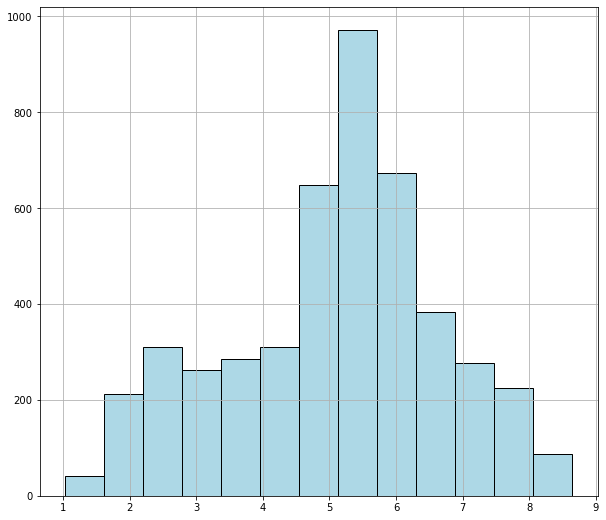

In [114]:
df['valence'].hist(bins=13, color = 'lightblue', edgecolor = 'k')
plt.show()

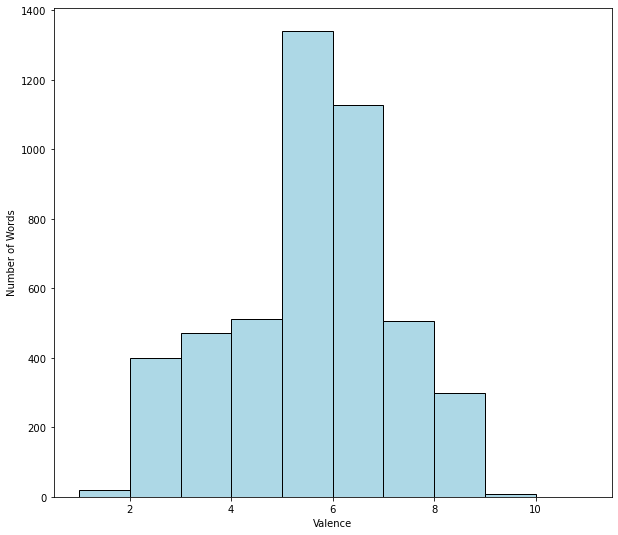

In [115]:
plt.hist(df['valence'].round(0), edgecolor='k', color = 'lightblue', bins=np.arange(1, 12, 1))
plt.xlabel('Valence')
plt.ylabel('Number of Words')
plt.show()

In [116]:
df['valence'].mean()

5.08679709525843

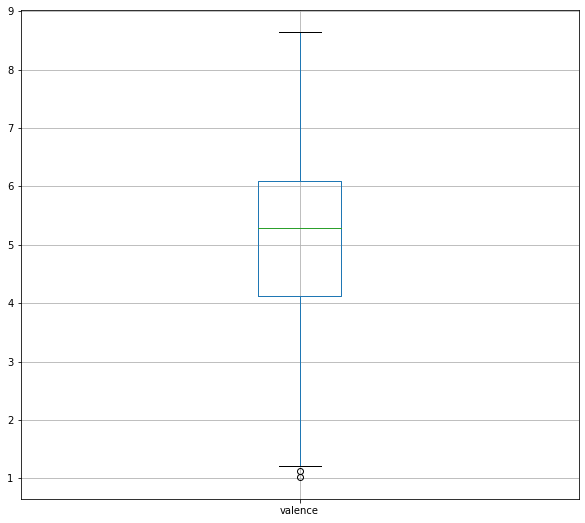

In [117]:
boxplot = df.boxplot(column=['valence'])

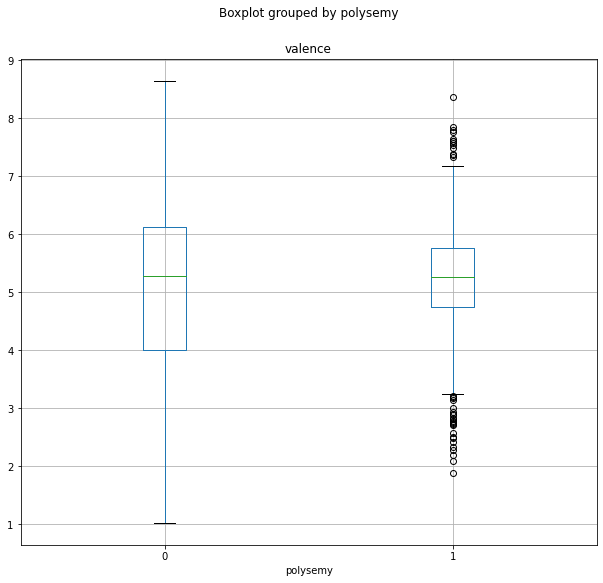

In [118]:
boxplot = df.boxplot(column=['valence'], by='polysemy')

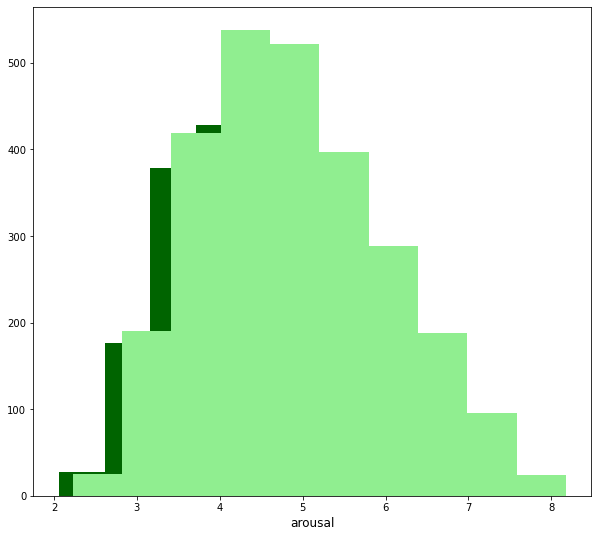

In [119]:
plt.hist( df[ df['valence'] < 5.09 ]['arousal'] , color = 'darkgreen')
plt.hist( df[ df['valence'] > 5.09 ]['arousal'] , color = 'lightgreen')
plt.xlabel('arousal', fontsize =12)
plt.show()

## Variable transformations 
* Is it better to use for further modules transformed variables (e.g., log-transformated)?


In [120]:
# log transformation, square root, z score, (normilize the value)

## Creating df similar table for Log transform values named df_log

In [121]:
#df_log = df
#df_log.rename(columns={'length': 'len_log', 'arousal': 'arou_log', 'valence': 'val_log', 'dominance': 'dom_log', 
#                       'concreteness': 'cnc_log', 'imageability': 'imag_log', 'familiarity': 'fam_log', 'aoa': 'aoa_log',
#                       'semsize': 'size_log', 'gender': 'gend_log', 'web_corpus_freq': 'wcf_log'
#                      })
#df_log.columns = ['word',  'len_log', 'arou_log', 'val_log', 'dom_log', 'cnc_log', 'imag_log', 'fam_log', 
#               'aoa_log', 'size_log', 'gend_log', 'polysemy', 'wcf_log']
#df_log

In [122]:
#### All numerical values are transformed !!!!!!!
#if df_log['len_log'][0] == 8:
#    df_log['len_log'] = np.log2(df_log['len_log'])
#    df_log['arou_log'] = np.log2(df_log['arou_log'])
#    df_log['val_log'] = np.log2(df_log['val_log'])
#    df_log['dom_log'] = np.log2(df_log['dom_log'])
#    df_log['cnc_log'] = np.log2(df_log['cnc_log'])
#    df_log['imag_log'] = np.log2(df_log['imag_log'])
#    df_log['fam_log'] = np.log2(df_log['fam_log'])
#    df_log['aoa_log'] = np.log2(df_log['aoa_log'])
#    df_log['size_log'] = np.log2(df_log['size_log'])
#    df_log['gend_log'] = np.log2(df_log['gend_log'])
#    df_log['wcf_log'] = np.log2(df_log['wcf_log'])
#
#df_log.head()

#### Saving 'df_log' table as xlsx and as csv

In [123]:
# df_log.to_excel("df_log.xlsx")
# df_log.to_csv("df_log.csv")

In [226]:
df = pd.read_csv('words_glasgow.csv', index_col=0)
df.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


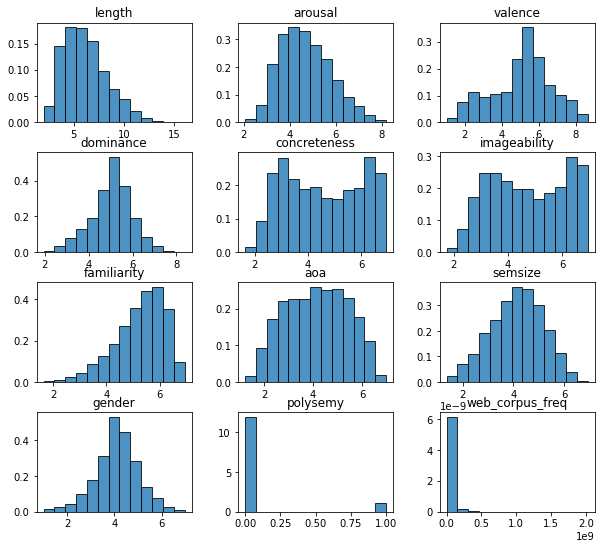

In [197]:
df.hist(density = True, bins = 13, grid = False, alpha = 0.8, edgecolor = 'k')
plt.show()

In [124]:
# read 'df_log' table
df_log = pd.read_csv('df_log.csv', index_col=0)
df_log.head()

,word,len_log,arou_log,val_log,dom_log,cnc_log,imag_log,fam_log,aoa_log,size_log,gend_log,polysemy,wcf_log
0,abattoir,3.000000,2.070389,1.518031,2.115366,2.447579,2.134550,1.252173,2.757023,2.217851,2.430553,0,17.288379
1,abbey,2.321928,1.643856,2.531319,2.222495,2.562181,2.417920,1.732920,2.372116,2.356426,1.723777,0,22.010473
2,abbreviate,3.321928,1.710614,2.392317,2.388190,1.716332,1.667665,2.356426,2.470667,1.415218,1.989502,0,17.096149
3,abdicate,3.000000,2.068327,1.913416,2.143720,1.751464,1.331132,1.989502,2.639927,2.226200,2.369327,0,16.921411
4,abdication,3.321928,1.943359,1.956057,2.263034,1.718964,1.362330,1.630871,2.679649,2.345680,2.192510,0,16.967395


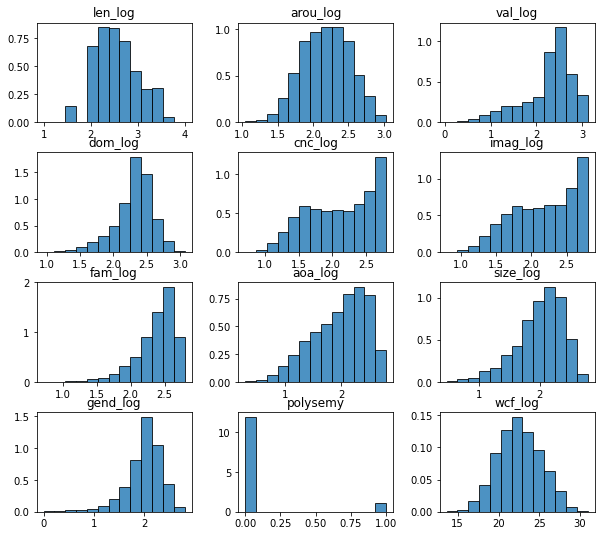

In [229]:
df_log.hist(density = True, bins = 13, grid = False, alpha = 0.8, edgecolor = 'k')
plt.show()

In [228]:
#df_sqrt = df.pow(1./2)
df_sqrt.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
abattoir,2.828427,2.049390,1.692336,2.081586,2.335594,2.095471,1.543373,2.600000,2.156850,2.321853,0.0,400.092489
abbey,2.236068,1.767767,2.404371,2.160324,2.430226,2.311709,1.823184,2.275302,2.262963,1.817416,0.0,2055.447397
abbreviate,3.162278,1.809143,2.291288,2.288012,1.812733,1.782414,2.262963,2.354358,1.633095,1.992737,0.0,374.306025
abdicate,2.828427,2.047926,1.940876,2.102142,1.834939,1.586190,1.992737,2.496598,2.163100,2.273104,0.0,352.310942
abdication,3.162278,1.961122,1.969772,2.190890,1.814387,1.603434,1.759830,2.531205,2.254551,2.137990,0.0,357.970669


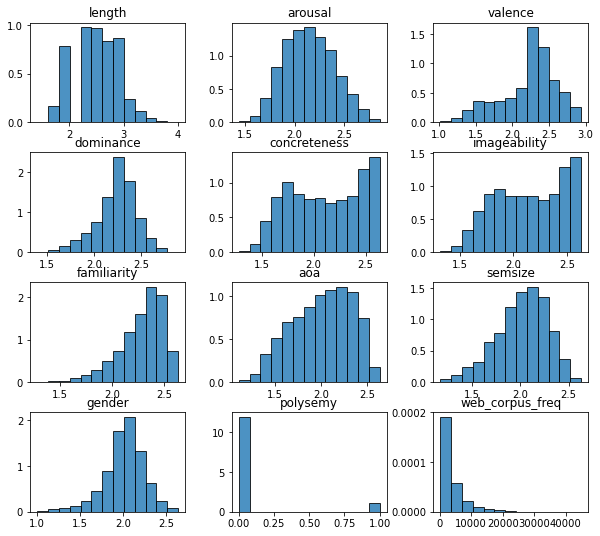

In [232]:
df_sqrt.hist(density = True, bins = 13, grid = False, alpha = 0.8, edgecolor = 'k')
plt.show()

In [234]:
#df_reciprocal = np.reciprocal(df)
df_reciprocal.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
word,,,,,,,,,,,,
abattoir,0,0.238095,0.349162,0.230787,0.183318,0.227739,0.419815,0.147929,0.214961,0.185494,-9223372036854775808,6.247111e-06
abbey,0,0.320000,0.172980,0.214270,0.169319,0.187126,0.300842,0.193162,0.195274,0.302755,-9223372036854775808,2.366940e-07
abbreviate,0,0.305530,0.190476,0.191022,0.304321,0.314762,0.195274,0.180408,0.374953,0.251826,-9223372036854775808,7.137504e-06
abdicate,0,0.238436,0.265463,0.226296,0.297000,0.397456,0.251826,0.160436,0.213721,0.193536,-9223372036854775808,8.056525e-06
abdication,0,0.260010,0.257732,0.208333,0.303767,0.388954,0.322893,0.156079,0.196734,0.218771,-9223372036854775808,7.803782e-06


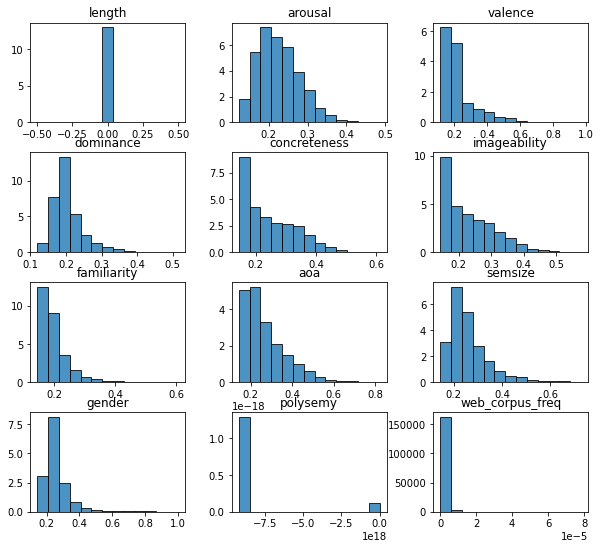

In [235]:
df_reciprocal.hist(density = True, bins = 13, grid = False, alpha = 0.8, edgecolor = 'k')
plt.show()

In [253]:
#power transformation 
pt = PowerTransformer()
print(pt.fit(df))

PowerTransformer()


In [254]:
print(pt.lambdas_)

[-7.10084125e-02  1.53713655e-02  1.34985264e+00  1.51270144e+00
  6.13092597e-01  8.08417301e-01  2.89578080e+00  9.07672634e-01
  1.24945696e+00  1.40069636e+00 -1.78214727e+01 -9.13112457e-03]


In [257]:
df_power = pt.transform(df)
df_power

array([[ 0.89004148, -0.36180414, -1.37127954, ...,  1.46516779,
        -0.29677952, -1.99735445],
       [-0.612346  , -1.5606382 ,  0.4044503 , ..., -0.89280251,
        -0.29677952, -0.18968378],
       [ 1.61774575, -1.37844188,  0.05651784, ..., -0.17934162,
        -0.29677952, -2.0720927 ],
       ...,
       [-1.30213739,  1.16005844,  1.11139748, ..., -0.73726203,
        -0.29677952, -1.21255821],
       [-2.15861809,  1.1150193 ,  0.70961753, ..., -0.08233473,
        -0.29677952,  0.35682483],
       [ 0.45806349, -0.00423753,  0.39382265, ..., -0.51983924,
        -0.29677952, -0.69603504]])

In [125]:
df_log_columns_list = df_log.columns.values.tolist()
#df_log_columns_list.pop(0) # deleting numbering column
df_log_columns_list

['word',
 'len_log',
 'arou_log',
 'val_log',
 'dom_log',
 'cnc_log',
 'imag_log',
 'fam_log',
 'aoa_log',
 'size_log',
 'gend_log',
 'polysemy',
 'wcf_log']

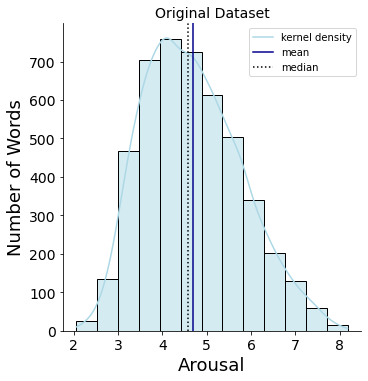

In [245]:
sns.displot(data=df, x='arousal', kde =True, bins = 13, color = 'lightblue', label ='kernel density')
plt.title('Original Dataset', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Arousal', fontsize = 18)
plt.ylabel('Number of Words', fontsize = 14)
plt.axvline(df['arousal'].mean(), color='darkblue', linestyle='-', linewidth=1.5, label = 'mean')
plt.axvline(df['arousal'].median(), color='k', linestyle=':',linewidth=1.5, label = 'median')
plt.legend(loc = 'best', labels = ['kernel density', 'mean', 'median'])
plt.savefig(os.path.join('AROU.png'), dpi=300, format='png', bbox_inches='tight') 
#plt.show()

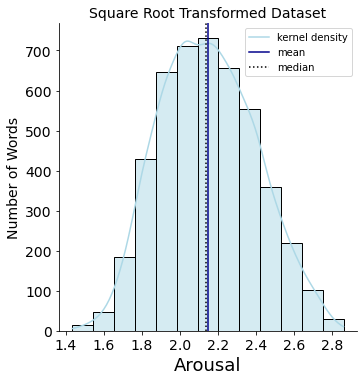

In [246]:
sns.displot(data=df_sqrt, x='arousal', kde =True, bins = 13, color = 'lightblue', label = 'kernel density')
plt.title('Square Root Transformed Dataset', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Arousal', fontsize = 18)
plt.ylabel('Number of Words', fontsize = 14)
plt.axvline(df_sqrt['arousal'].mean(), color='darkblue', linestyle='-', linewidth=1.5, label = 'mean')
plt.axvline(df_sqrt['arousal'].median(), color='k', linestyle=':',linewidth=1.5, label = 'median')
plt.legend(loc = 'best', labels = ['kernel density', 'mean', 'median'])
#plt.show()
plt.savefig(os.path.join('AROUsqrt.png'), dpi=300, format='png', bbox_inches='tight') 
#plt.savefig('wcf_distr.png')

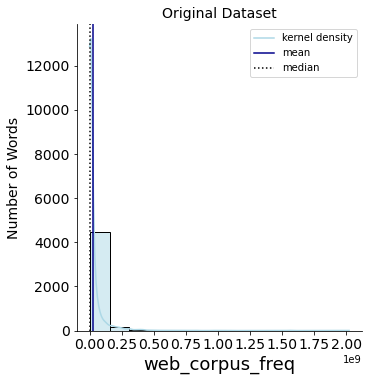

In [248]:
sns.displot(data=df, x='web_corpus_freq', kde =True, bins = 13, color = 'lightblue', label = 'Kernel Density')
plt.title('Original Dataset', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(item, fontsize = 18)
plt.ylabel('Number of Words', fontsize = 14)
plt.axvline(df['web_corpus_freq'].mean(), color='darkblue', linestyle='-', linewidth=1.5, label = 'mean')
plt.axvline(df['web_corpus_freq'].median(), color='k', linestyle=':',linewidth=1.5, label = 'median')
plt.legend(loc = 'best', labels = ['kernel density', 'mean', 'median'])
#plt.show()
plt.savefig(os.path.join('WCF.png'), dpi=300, format='png', bbox_inches='tight') 

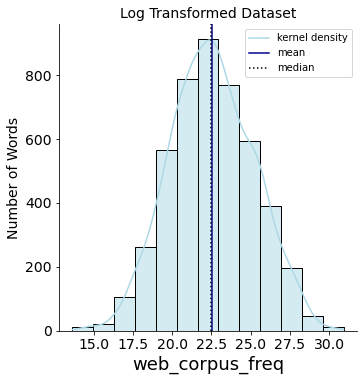

In [247]:
sns.displot(data=df_log, x='wcf_log', kde =True, bins = 13, color = 'lightblue', label = 'Kernel Density')
plt.title('Log Transformed Dataset', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(item, fontsize = 18)
plt.ylabel('Number of Words', fontsize = 14)
plt.axvline(df_log['wcf_log'].mean(), color='darkblue', linestyle='-', linewidth=1.5, label = 'mean')
plt.axvline(df_log['wcf_log'].median(), color='k', linestyle=':', linewidth=1.5, label = 'median')
plt.legend(loc = 'best', labels = ['kernel density', 'mean', 'median'])
#plt.show()
plt.savefig(os.path.join('WCFlog.png'), dpi=300, format='png', bbox_inches='tight') 

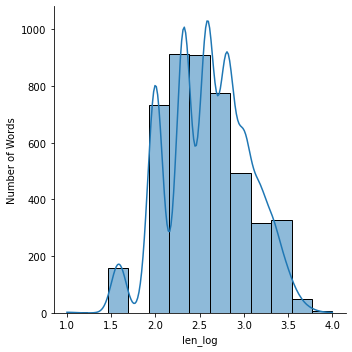

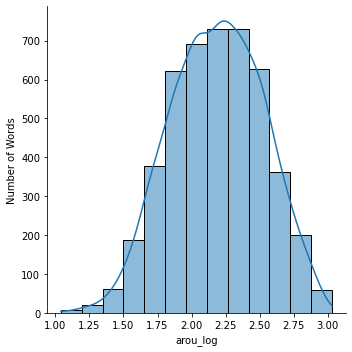

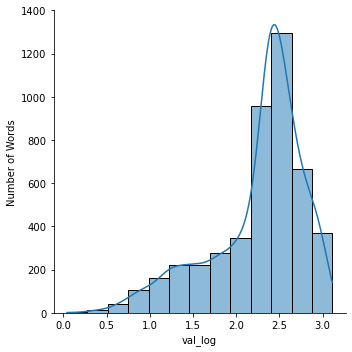

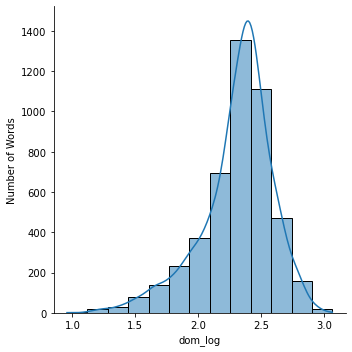

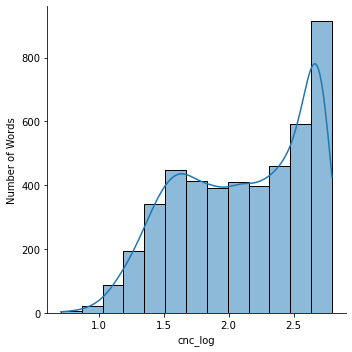

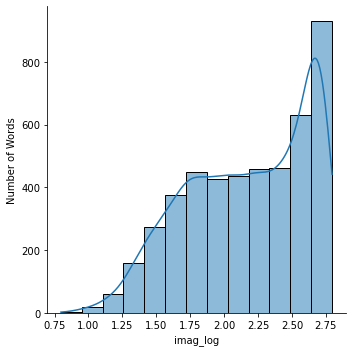

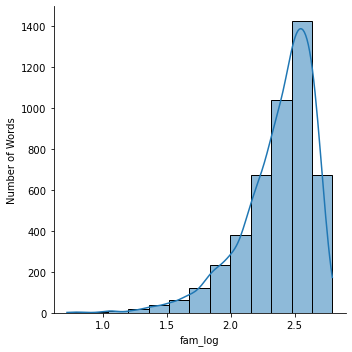

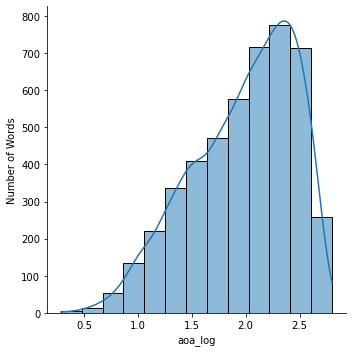

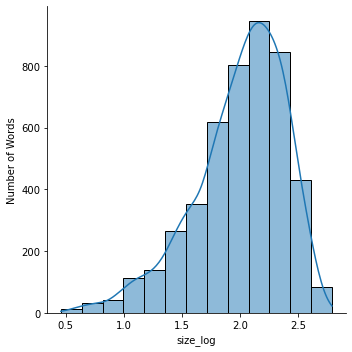

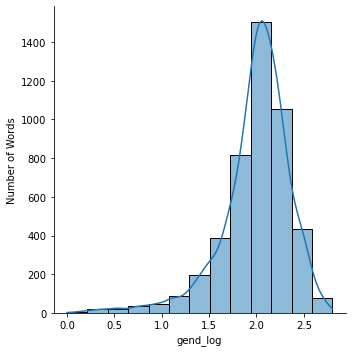

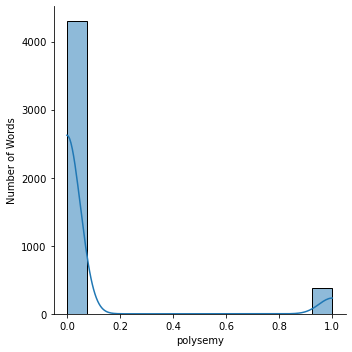

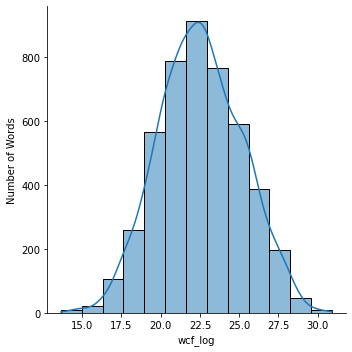

In [399]:
for item in df_log_columns_list:
    if item != 'word':
        sns.displot(data=df_log, x=item, kde =True, bins = 13)
        plt.xlabel(item)
        plt.ylabel('Number of Words')
        plt.show()


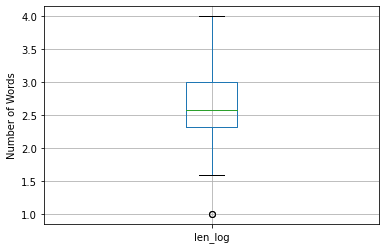

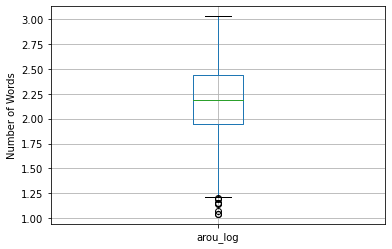

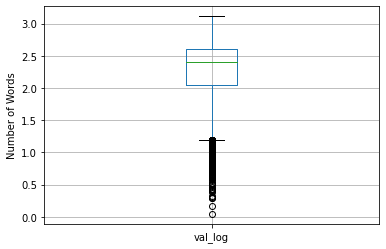

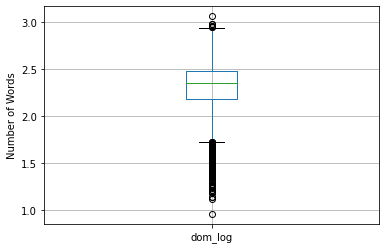

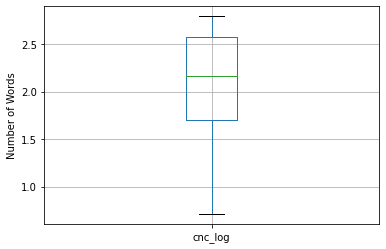

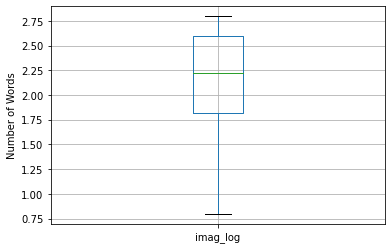

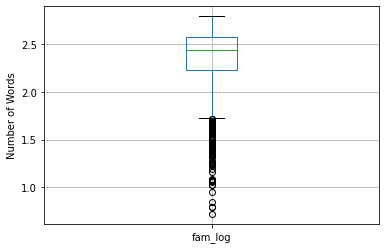

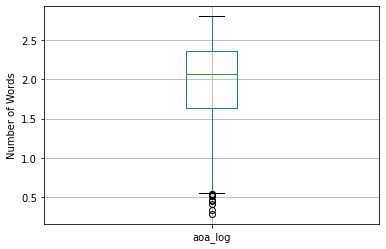

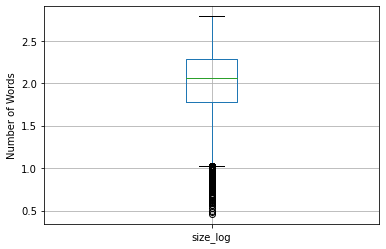

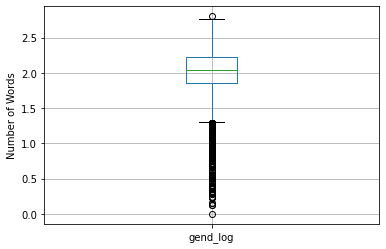

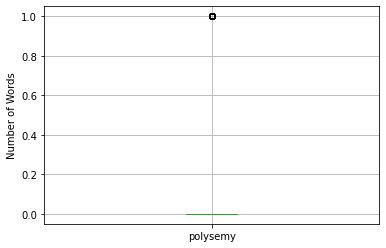

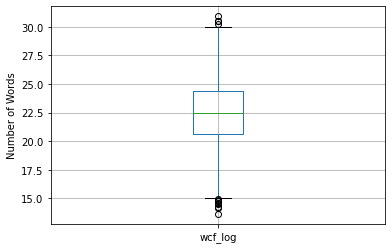

In [111]:
for item in df_log_columns_list:
    if item != 'word':
        df_log.boxplot(column=item)
        plt.ylabel('Number of Words')
        plt.show()

In [266]:
df_pearson = df.corr(method='pearson')
df_spearman = df.corr(method='spearman')
df_kendall = df.corr(method='kendall')
#df_pearson.style.background_gradient(cmap='coolwarm')
df_spearman.style.background_gradient(cmap='coolwarm') 
#df_kendall.style.background_gradient(cmap='coolwarm')

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.147804,0.053738,0.007002,-0.202149,-0.202792,-0.141403,0.412430,0.318125,-0.002198,-0.249338,-0.244337
arousal,0.147804,1.000000,0.354573,0.356341,-0.236691,-0.080643,0.167961,-0.004926,0.514712,-0.106969,-0.084989,0.068559
valence,0.053738,0.354573,1.000000,0.702252,0.042002,0.091276,0.294600,-0.188121,0.121232,-0.429474,0.000449,0.300342
dominance,0.007002,0.356341,0.702252,1.000000,0.042363,0.080612,0.234658,-0.141472,0.098469,-0.111078,0.051475,0.223458
concreteness,-0.202149,-0.236691,0.042002,0.042363,1.000000,0.903587,0.097511,-0.387694,-0.400490,0.141523,0.112280,0.025347
imageability,-0.202792,-0.080643,0.091276,0.080612,0.903587,1.000000,0.209765,-0.498524,-0.319086,0.063690,0.101208,0.022608
familiarity,-0.141403,0.167961,0.294600,0.234658,0.097511,0.209765,1.000000,-0.670507,0.045278,-0.217116,0.104050,0.579648
aoa,0.412430,-0.004926,-0.188121,-0.141472,-0.387694,-0.498524,-0.670507,1.000000,0.224328,0.144490,-0.180417,-0.413056
semsize,0.318125,0.514712,0.121232,0.098469,-0.400490,-0.319086,0.045278,0.224328,1.000000,0.148675,-0.137745,0.161435
gender,-0.002198,-0.106969,-0.429474,-0.111078,0.141523,0.063690,-0.217116,0.144490,0.148675,1.000000,0.025161,-0.075323


In [233]:
log_corr = df_log.corr()
log_corr.style.background_gradient(cmap='coolwarm')

,len_log,arou_log,val_log,dom_log,cnc_log,imag_log,fam_log,aoa_log,size_log,gend_log,polysemy,wcf_log
len_log,1.000000,0.156133,-0.010435,-0.023409,-0.214726,-0.213714,-0.129587,0.423085,0.298662,0.001661,-0.246940,-0.258582
arou_log,0.156133,1.000000,0.192257,0.290068,-0.245880,-0.074358,0.167127,-0.000622,0.485854,-0.150319,-0.084245,0.065070
val_log,-0.010435,0.192257,1.000000,0.714911,0.106892,0.107424,0.178875,-0.190897,-0.038412,-0.356280,0.045769,0.289392
dom_log,-0.023409,0.290068,0.714911,1.000000,0.068237,0.086770,0.157720,-0.134300,0.029583,-0.089617,0.063480,0.212823
cnc_log,-0.214726,-0.245880,0.106892,0.068237,1.000000,0.882373,0.078367,-0.362055,-0.410207,0.083108,0.121211,0.034307
imag_log,-0.213714,-0.074358,0.107424,0.086770,0.882373,1.000000,0.204615,-0.464382,-0.333460,-0.008364,0.108762,0.021544
fam_log,-0.129587,0.167127,0.178875,0.157720,0.078367,0.204615,1.000000,-0.619479,0.010808,-0.161921,0.103677,0.559395
aoa_log,0.423085,-0.000622,-0.190897,-0.134300,-0.362055,-0.464382,-0.619479,1.000000,0.256477,0.153047,-0.174830,-0.411539
size_log,0.298662,0.485854,-0.038412,0.029583,-0.410207,-0.333460,0.010808,0.256477,1.000000,0.148745,-0.124886,0.151718
gend_log,0.001661,-0.150319,-0.356280,-0.089617,0.083108,-0.008364,-0.161921,0.153047,0.148745,1.000000,0.031170,-0.043958


In [113]:
# Standard Deviation
df.std()

len_log     0.455142
arou_log    0.340594
val_log     0.541990
dom_log     0.287657
cnc_log     0.483489
imag_log    0.445737
fam_log     0.284088
aoa_log     0.478673
size_log    0.393827
gend_log    0.365499
polysemy    0.272785
wcf_log     2.661314
dtype: float64

In [114]:
df_mean_std = df.agg([np.mean, np.std])
df_mean_std

,len_log,arou_log,val_log,dom_log,cnc_log,imag_log,fam_log,aoa_log,size_log,gend_log,polysemy,wcf_log
mean,2.595318,2.186158,2.25799,2.307834,2.113726,2.174177,2.372541,1.976819,1.998574,1.993954,0.080948,22.536658
std,0.455142,0.340594,0.54199,0.287657,0.483489,0.445737,0.284088,0.478673,0.393827,0.365499,0.272785,2.661314


## 'Concreteness'

In [267]:
df = pd.read_csv('words_glasgow.csv')
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


In [122]:
df['concreteness'].describe()

count    4682.000000
mean        4.566273
std         1.433689
min         1.636000
25%         3.242000
50%         4.471000
75%         5.971000
max         6.938000
Name: concreteness, dtype: float64

<AxesSubplot:>

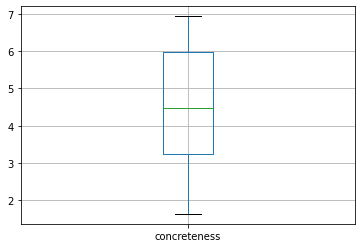

In [123]:
df.boxplot(column=['concreteness'])

<AxesSubplot:>

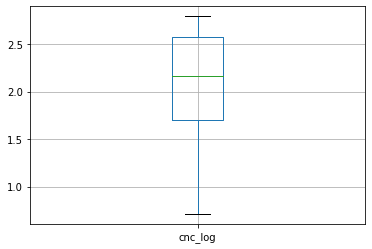

In [125]:
df_log.boxplot(column=['cnc_log'])

## 'Imageability'

In [126]:
df['imageability'].describe()

count    4682.000000
mean        4.723018
std         1.363110
min         1.737000
25%         3.519250
50%         4.677000
75%         6.032000
max         6.941000
Name: imageability, dtype: float64

Text(0, 0.5, 'Value Range')

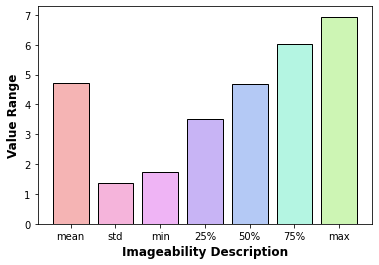

In [127]:
desc = df.imageability.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
#plt.title('Attribute "Imageability" Description', fontweight='bold', fontsize = 14)
plt.xlabel('Imageability Description',fontweight='bold', fontsize = 12)
plt.ylabel('Value Range', fontweight='bold', fontsize = 12)

<AxesSubplot:>

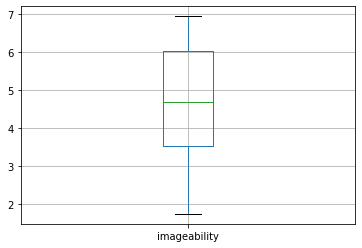

In [128]:
df.boxplot(column=['imageability'])

<AxesSubplot:>

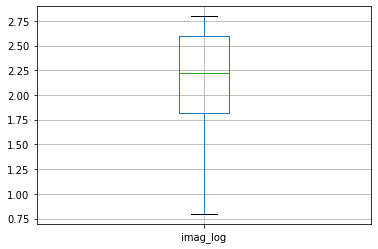

In [129]:
df_log.boxplot(column=['imag_log'])

## 'Valence'

In [130]:
df['valence'].describe()

count    4682.000000
mean        5.086797
std         1.594344
min         1.030000
25%         4.115000
50%         5.290000
75%         6.088000
max         8.647000
Name: valence, dtype: float64

Text(0, 0.5, 'Value Range')

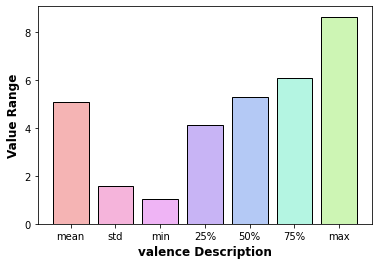

In [131]:
desc = df.valence.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
#plt.title('Attribute "valence" Description', fontweight='bold', fontsize = 14)
plt.xlabel('valence Description',fontweight='bold', fontsize = 12)
plt.ylabel('Value Range', fontweight='bold', fontsize = 12)

<AxesSubplot:>

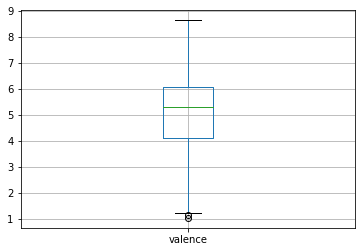

In [132]:
df.boxplot(column=['valence'])

<AxesSubplot:title={'center':'valence'}, xlabel='polysemy'>

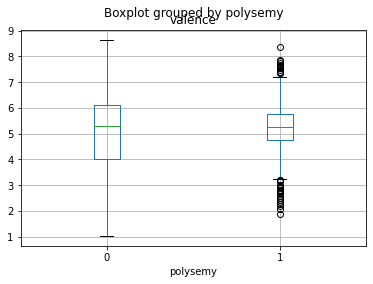

In [133]:
df.boxplot(column=['valence'], by = 'polysemy')

## 'Dominance'

In [134]:
df['dominance'].describe()

count    4682.000000
mean        5.044939
std         0.930669
min         1.941000
25%         4.529000
50%         5.123000
75%         5.600000
max         8.371000
Name: dominance, dtype: float64

Text(0, 0.5, 'Value Range')

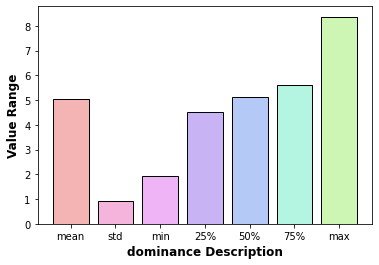

In [135]:
desc = df.dominance.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
#plt.title('Attribute "valence" Description', fontweight='bold', fontsize = 14)
plt.xlabel('dominance Description',fontweight='bold', fontsize = 12)
plt.ylabel('Value Range', fontweight='bold', fontsize = 12)

<AxesSubplot:>

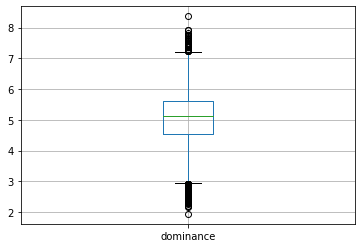

In [136]:
df.boxplot(column='dominance')

<AxesSubplot:title={'center':'dominance'}, xlabel='polysemy'>

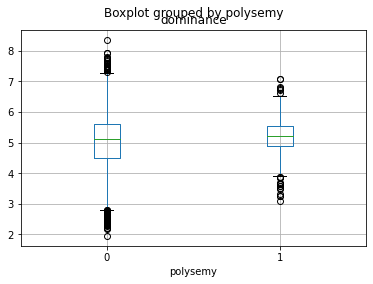

In [137]:
df.boxplot(column = ['dominance'], by = 'polysemy')

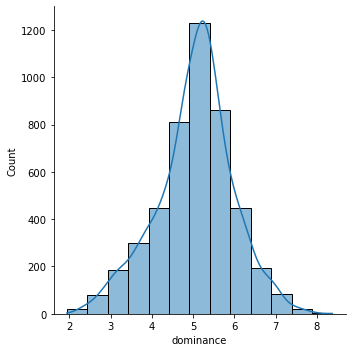

In [138]:
sns.displot(data=df, x='dominance', kde =True, bins = 13)
plt.show()

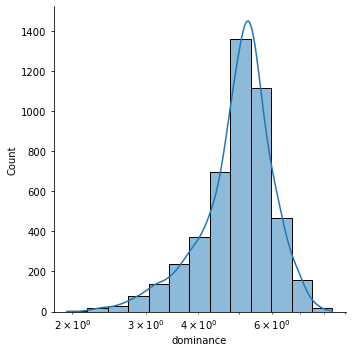

In [139]:
# log transform
# number of bins 13.1929 = 13
sns.displot(data=df, log_scale = True,  x='dominance', kde =True, bins = 13)
plt.show()

## 'Web_Corpus_freq'

In [140]:
df['web_corpus_freq'].describe()

count    4.668000e+03
mean     2.988976e+07
std      8.490144e+07
min      1.277000e+04
25%      1.671100e+06
50%      5.702982e+06
75%      2.232705e+07
max      2.022460e+09
Name: web_corpus_freq, dtype: float64

Text(0, 0.5, 'Value Range')

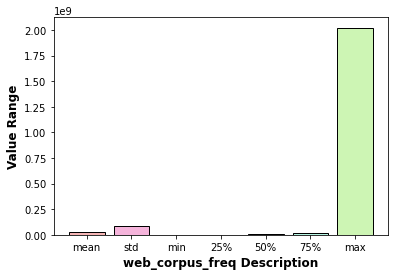

In [141]:
desc = df.web_corpus_freq.describe()
desc_dict = desc.to_dict()
desc_count = desc_dict['count']
del desc_dict['count']
#desc_dict
plt.bar(range(len(desc_dict)), list(desc_dict.values()), align='center', color = light_colors_list, edgecolor = 'k')
plt.xticks(range(len(desc_dict)), list(desc_dict.keys()))
#plt.title('Attribute "web_corpus_freq" Description', fontweight='bold', fontsize = 14)
plt.xlabel('web_corpus_freq Description',fontweight='bold', fontsize = 12)
plt.ylabel('Value Range', fontweight='bold', fontsize = 12)

<AxesSubplot:>

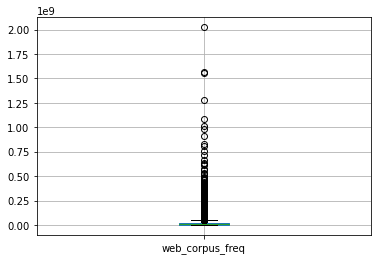

In [142]:
df.boxplot(column='web_corpus_freq')

<AxesSubplot:>

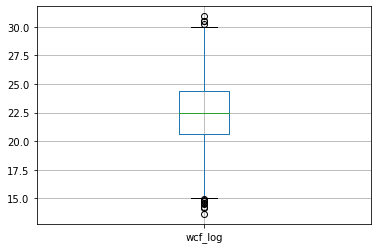

In [144]:
# web_corpus_freq log transform boxplot
df_log.boxplot(column='wcf_log')

### WCF outliers

In [156]:

# df['wcf_log_base2'].between(15.0, 30.0, inclusive=False) 
df[df['wcf_log'] > 30.0]

KeyError: 'wcf_log'

In [ ]:
df[df['wcf_log'] < 15.0]

In [ ]:
sns.displot(data=df, x='web_corpus_freq', kde=True, bins=13)
plt.show()

In [ ]:
# log transform
# number of bins 13.1929 = 13
sns.displot(data=df, log_scale = True,  x='web_corpus_freq', kde =True, bins = 13)
plt.show()

In [ ]:
sns.displot(data=df, x='wcf_log', kde =True, bins = 13)
plt.show()

## Random Sampling

In [39]:
df_subset = df.sample(n=1000)
df_subset.sort_values('word', ascending=True)

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
4373,Twitter,7,4.235,4.943,4.824,4.886,5.600,6.273,6.971,4.771,3.829,0,NaN
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
11,abide,5,3.875,5.375,4.500,2.485,2.364,4.226,5.697,4.033,4.147,0,3722809.0
18,absorb,6,4.484,5.438,5.125,3.188,3.576,5.033,4.688,3.719,3.793,0,2378096.0
29,accent,6,5.529,5.629,5.182,3.600,3.618,5.875,4.059,4.029,3.853,0,6036395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,yolk,4,4.121,5.194,5.182,6.267,6.438,4.900,3.219,2.161,3.586,0,451960.0
4672,youth,5,5.548,6.563,5.219,3.677,4.355,5.929,4.156,4.094,3.742,0,51426255.0
4674,zeal,4,5.913,6.429,6.174,2.947,2.826,2.688,5.917,4.474,3.909,0,1084831.0
4675,zebra,5,4.818,5.939,5.406,6.807,6.813,5.192,2.818,4.147,4.129,0,2902469.0


In [70]:
#stratified sampling 
df_strSampling = df.groupby('length', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))
#df.groupby('polysemy', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))
df_strSampling

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
4403,up,2,5.229,6.265,5.943,4.235,5.412,6.531,1.486,4.353,4.029,0,829969374.0
4365,TV,2,4.824,5.706,4.559,6.677,6.857,6.706,2.206,3.333,4.629,0,NaN
2373,law,3,3.600,5.406,3.548,3.613,3.133,5.929,3.733,5.563,4.897,0,216122487.0
604,buy,3,5.706,6.265,5.886,4.206,4.171,6.613,2.647,4.314,3.686,0,410780176.0
3340,quit,4,4.242,2.588,5.194,3.485,3.375,5.394,3.457,4.212,4.485,0,10324803.0
2504,lush,4,5.059,6.939,5.382,2.800,3.177,4.636,5.286,3.091,2.455,0,2659754.0
429,blame,5,4.343,2.743,3.765,2.543,2.571,6.057,3.286,5.171,4.286,0,8170544.0
1014,crisp,5,5.086,5.853,5.343,5.114,5.686,5.606,2.543,2.882,4.429,1,3880385.0
3121,piston,6,5.179,4.710,4.893,5.769,5.444,3.394,5.893,3.613,5.586,0,2381202.0
511,boxing,6,4.606,4.559,5.455,5.971,6.394,5.618,3.824,4.030,6.030,0,8319372.0


### Observation about Uppercase words

In [159]:
df[df['word'].str.isupper() == True]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,arou_zscore
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN,-0.038399
4347,TRUE,4,5.743,7.914,6.219,2.529,2.719,6.156,2.400,5.424,3.182,0,NaN,0.970567
4365,TV,2,4.824,5.706,4.559,6.677,6.857,6.706,2.206,3.333,4.629,0,NaN,0.132952


In [160]:
df[df['word'].str.istitle() == True]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,arou_zscore
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN,2.586552
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN,0.213159
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN,-0.441256
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN,0.266934
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN,0.901297
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN,-0.076679
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN,0.625131
4373,Twitter,7,4.235,4.943,4.824,4.886,5.600,6.273,6.971,4.771,3.829,0,NaN,-0.403886


In [162]:
df[df['web_corpus_freq'].isnull() == True] # why is 

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,arou_zscore
585,burgle,6,5.118,2.303,3.656,4.970,5.424,5.200,3.735,4.697,5.333,0,NaN,0.400916
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN,2.586552
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN,0.213159
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN,-0.441256
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN,0.266934
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN,-0.038399
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN,0.901297
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN,-0.076679
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN,0.625131
3773,skijump,7,5.914,5.771,5.486,6.200,6.529,4.758,5.028,5.389,5.000,0,NaN,1.126423


In [57]:
df['web_corpus_freq'].isnull().sum()

14

In [58]:
df['word'].str.istitle().sum() + df['word'].str.isupper().sum()

11

## Assessing data quality 
 * Are present errors, outliers, missing values, semantic inconsistencies, etc?

### Check for Duplicate Data

In [ ]:
df.shape

In [ ]:
df.word.nunique()

In [ ]:
# check for duplicates 
(df.duplicated() == True).sum()

In [164]:
df['arou_sqroot'] = np.sqrt((df['arousal']))
df[['arousal', 'arou_sqroot']]

,arousal,arou_sqroot
0,4.200,2.049390
1,3.125,1.767767
2,3.273,1.809143
3,4.194,2.047926
4,3.846,1.961122
...,...,...
4677,6.185,2.486966
4678,4.031,2.007735
4679,5.969,2.443154
4680,5.909,2.430843


In [270]:
df['arou_zscore'] = (df.arousal - df.arousal.mean())/df.arousal.std(ddof=0)
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,arou_zscore
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,-0.435833
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,-1.415737
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,-1.280830
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,-0.441303
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,-0.758518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,1.373571
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0,-0.589883
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,1.176678
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,1.121986


Text(0, 0.5, '(2.057, 8.177)')

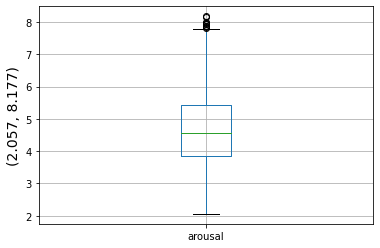

In [268]:
df.boxplot(column='arousal') 
plt.ylabel((min(df.arousal.round(3)), max(df.arousal.round(3))), fontsize = 14)

Text(0, 0.5, '(-2.389, 3.189)')

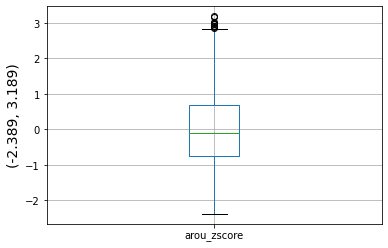

In [271]:
df.boxplot(column='arou_zscore')
plt.ylabel((min(df.arou_zscore.round(3)), max(df.arou_zscore.round(3))), fontsize = 14)

In [272]:
#df_log['wcf_zscore'] = (df_log.wcf_log - df_log.wcf_log.mean())/df_log.wcf_log.std(ddof=0)
#df_log

,word,len_log,arou_log,val_log,dom_log,cnc_log,imag_log,fam_log,aoa_log,size_log,gend_log,polysemy,wcf_log,wcf_zscore
0,abattoir,3.000000,2.070389,1.518031,2.115366,2.447579,2.134550,1.252173,2.757023,2.217851,2.430553,0,17.288379,-1.972274
1,abbey,2.321928,1.643856,2.531319,2.222495,2.562181,2.417920,1.732920,2.372116,2.356426,1.723777,0,22.010473,-0.197737
2,abbreviate,3.321928,1.710614,2.392317,2.388190,1.716332,1.667665,2.356426,2.470667,1.415218,1.989502,0,17.096149,-2.044514
3,abdicate,3.000000,2.068327,1.913416,2.143720,1.751464,1.331132,1.989502,2.639927,2.226200,2.369327,0,16.921411,-2.110179
4,abdication,3.321928,1.943359,1.956057,2.263034,1.718964,1.362330,1.630871,2.679649,2.345680,2.192510,0,16.967395,-2.092899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,3.000000,2.628774,2.321928,2.414947,2.652142,2.628774,1.663117,2.593593,2.449957,2.397529,0,21.606455,-0.349565
4678,zero,2.000000,2.011138,2.064193,2.191247,1.426533,1.964583,2.648235,1.398350,0.813935,2.060739,0,24.873398,0.878134
4679,zest,2.000000,2.577489,2.769349,2.613767,2.149910,2.011853,2.000000,2.423309,1.398350,1.787432,0,19.321157,-1.208368
4680,zoo,1.584963,2.562914,2.640390,2.455492,2.613060,2.687285,2.499527,1.216610,2.276199,2.021124,0,23.466325,0.349364


Text(0, 0.5, '(-3.343, 3.148)')

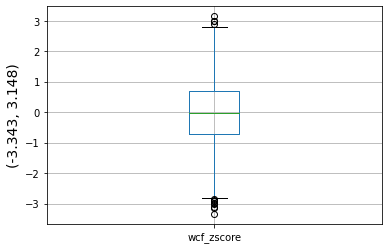

In [273]:
#df_log.boxplot(column='wcf_zscore')
#plt.ylabel((min(df_log.wcf_zscore.round(3)), max(df_log.wcf_zscore.round(3))), fontsize = 14)

##### We do not have any dublicate rows 

### Missing Values

In [ ]:
df.isnull().any()

In [ ]:
# how many values are missing
df.web_corpus_freq.isnull().sum() 

In [ ]:
hmap = sns.heatmap(df.isnull(), cbar=True, vmin=0, vmax=1)
hmap

In [ ]:
df[df['web_corpus_freq'].isnull() == True]

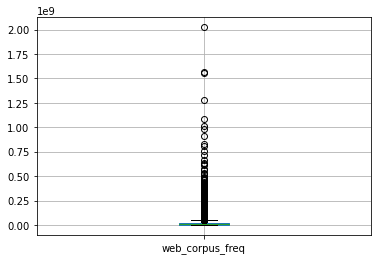

In [146]:
boxplot = df.boxplot(column=['web_corpus_freq'])

<AxesSubplot:>

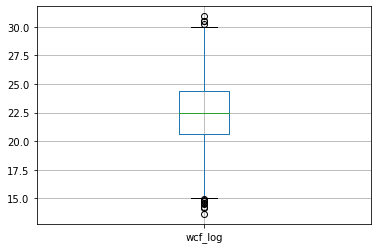

In [147]:
df_log.boxplot(column=['wcf_log'])

<AxesSubplot:title={'center':'web_corpus_freq'}, xlabel='polysemy'>

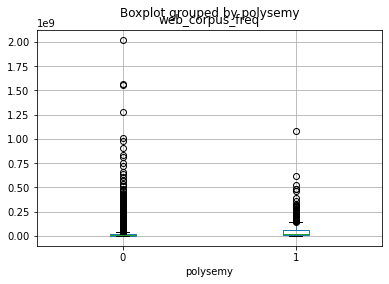

In [148]:
df.boxplot(column=['web_corpus_freq'], by='polysemy')

<AxesSubplot:title={'center':'wcf_log'}, xlabel='polysemy'>

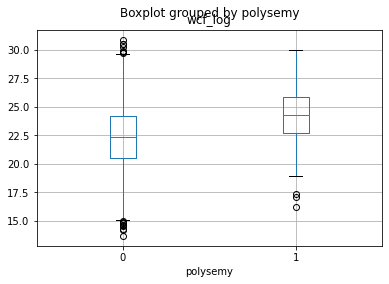

In [149]:
df_log.boxplot(column=['wcf_log'], by = 'polysemy')

#### Filling Missing Values and Saving new csv file

In [2]:
## Filling missing values with mean value and saving new csv table file
#mean_web_corpus_freq = df['web_corpus_freq'].mean()
#df=df.fillna(mean_web_corpus_freq)
#df.isna().sum()
#-----------------------------------
## Saved in table 'df_filled'
#df.to_csv("df_filled.csv")

#### Filled missing values and Log transform and save new csv

In [ ]:
## Filling missing values with mean value and saving new csv table file
#mean_web_corpus_freq = df['web_corpus_freq'].mean()
#df=df.fillna(mean_web_corpus_freq)
#df.isna().sum()
###---------------------------------
#df['web_corpus_freq'] = np.log10(df['web_corpus_freq'])
##-----------------------------------
# Saved in table 'df_filled'
#df.to_csv("df_filled.csv")

### Check Errors of 'Polysemy' Attribute

In [150]:
# checking second dataset of polysemy values
df_poly = pd.read_csv('words_polysemy_values.csv')

In [151]:
type(df_poly.values)

numpy.ndarray

In [152]:
# Number of records in Polysemy dataset
df_poly.shape[0]

871

In [153]:
# Number of polysemy records in df dataset 
df[df['polysemy'] == 1].shape[0]

379

In [154]:
# Spliting the word on space 
df_poly_split = df_poly["word"].str.split(" ", 1, expand=True)
df_poly_split.columns = ['word', 'desc']
#df_poly_split = df_poly_split.rename(columns={'0': 'word', '1': 'desc'})
df_poly_split

,word,desc
0,address,(postal)
1,address,(speak to)
2,aim,(objective)
3,aim,(target)
4,Apple,(brand)
...,...,...
866,yak,(gab)
867,yard,(distance)
868,yard,(lawn)
869,yarn,(fabric)


In [155]:
# find out how many unique words we have in polysemy dataset
df_poly_split.word.nunique()

380

In [156]:
# finding the difference between two datasets 
df_diff = set(df_poly_split.word.unique()) - set(df[df['polysemy'] == 1].word)
df_diff

{'Apple'}

### Check Words length Errors & Inconsistent Values

In [157]:
df['word_len'] = 0
df[['word', 'word_len']].head()

,word,word_len
0,abattoir,0
1,abbey,0
2,abbreviate,0
3,abdicate,0
4,abdication,0


In [158]:
for index in df.word.index:
    df['word_len'][index] = len(df['word'][index])

<ipython-input-158-0f4f32946d2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_len'][index] = len(df['word'][index])


In [159]:
len(df.word[0])

8

In [160]:
df[['word', 'word_len']].head()

,word,word_len
0,abattoir,8
1,abbey,5
2,abbreviate,10
3,abdicate,8
4,abdication,10


In [161]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,word_len
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,8
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,5
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,10
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,8
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,10


In [162]:
df["comparison"] = np.where(df['length'] == df['word_len'], True, False)

In [163]:
# Actual length of the words and attribute length is correspondingly equal as we have 0 errors
len(df[df['comparison'] == False])

0

In [164]:
df.shape

(4682, 15)

## Pairwise correlations and eventual elimination of variables 
* Matrix correlation (analyze high correlated variables)

In [42]:
df_new = pd.read_csv('df_new.csv', index_col=0)
#df_new.head()

In [44]:
##rename
#df_new.rename(columns={'word': 'word', 'length': 'length', 'arousal': 'AROU', 'valence': 'VAL', 'dominance': 'DOM', 
#                       'concreteness': 'CNC', 'imageability': 'IMAG', 'familiarity': 'FAM', 'aoa': 'AOA', 'semsize': 'SIZE', 
#                       'gender': 'GEND', 'polysemy' : 'polysemy' , 'web_corpus_freq': 'WCF'
#                      })
#df_new.columns = ['word', 'length', 'AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND', 'polysemy', 'WCF']
df_new.head()

,word,length,AROU,VAL,DOM,CNC,IMAG,FAM,AOA,SIZE,GEND,polysemy,WCF
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


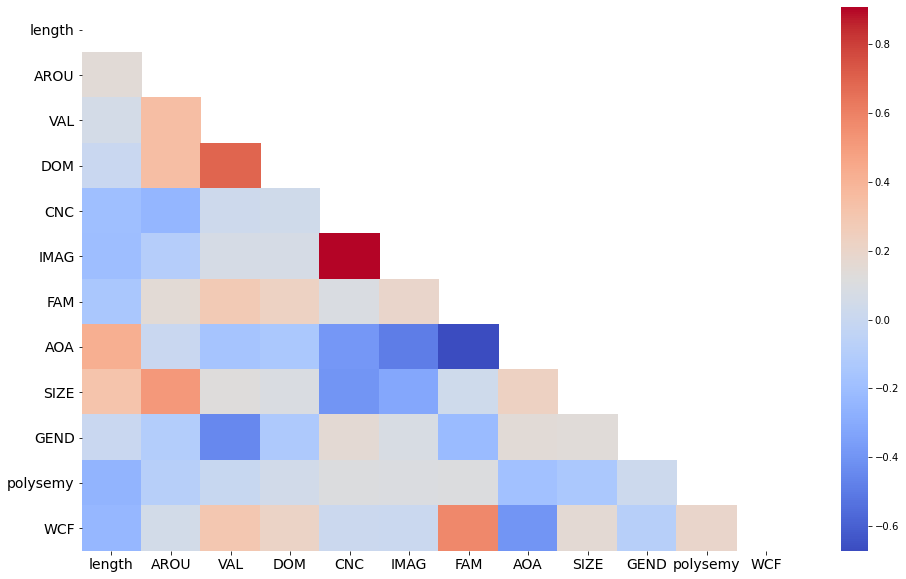

In [52]:
corr = df_new.corr(method = 'spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (16,10))
sns.heatmap(corr, mask = mask, annot=False, cbar=True, cmap='coolwarm')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.savefig(os.path.join('CorrSpearman.png'), dpi=300, format='png', bbox_inches='tight') 
plt.show()

In [29]:
# ‘pearson’, ‘kendall’, ‘spearman’
#corr1 = df_new.corr(method = 'pearson') # good one
#corr1.style.background_gradient(cmap='coolwarm')

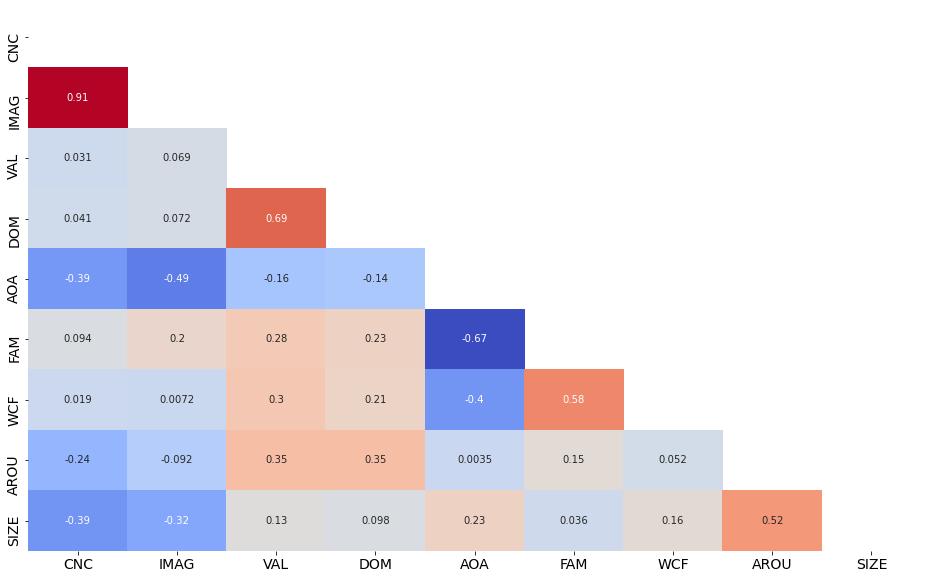

In [48]:
# good one
corr2 = df_new[['CNC', 'IMAG', 'VAL', 'DOM', 'AOA', 'FAM', 'WCF', 'AROU', 'SIZE']].corr(method = 'spearman')
#corr2.style.background_gradient()
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,10))
sns.heatmap(corr2, mask = mask, annot=True, cbar=False, cmap='coolwarm')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.savefig(os.path.join('CorrPairs.png'), dpi=300, format='png', bbox_inches='tight') 
plt.show()

In [7]:
# good one
corr2 = df_new.corr(method = 'spearman')
corr2.style.background_gradient(cmap='coolwarm')

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.145464,0.059453,0.004385,-0.194515,-0.198722,-0.146329,0.420219,0.319121,0.002066,-0.253996,-0.236759
arousal,0.145464,1.000000,0.347621,0.350007,-0.240232,-0.092480,0.152543,0.003466,0.515755,-0.100405,-0.085548,0.052446
valence,0.059453,0.347621,1.000000,0.692112,0.031498,0.068752,0.283320,-0.164728,0.126320,-0.449254,-0.002724,0.297083
dominance,0.004385,0.350007,0.692112,1.000000,0.040539,0.071704,0.225413,-0.137209,0.098153,-0.125313,0.048869,0.212024
concreteness,-0.194515,-0.240232,0.031498,0.040539,1.000000,0.907374,0.094094,-0.385308,-0.394185,0.155156,0.111684,0.019102
imageability,-0.198722,-0.092480,0.068752,0.071704,0.907374,1.000000,0.197911,-0.491110,-0.317433,0.083487,0.100827,0.007174
familiarity,-0.146329,0.152543,0.283320,0.225413,0.094094,0.197911,1.000000,-0.671450,0.035679,-0.221220,0.106901,0.575066
aoa,0.420219,0.003466,-0.164728,-0.137209,-0.385308,-0.491110,-0.671450,1.000000,0.234700,0.145470,-0.183591,-0.399548
semsize,0.319121,0.515755,0.126320,0.098153,-0.394185,-0.317433,0.035679,0.234700,1.000000,0.139870,-0.139102,0.159096
gender,0.002066,-0.100405,-0.449254,-0.125313,0.155156,0.083487,-0.221220,0.145470,0.139870,1.000000,0.021496,-0.082135


In [283]:
#not Good
#corr3 = df_new.corr(method = 'kendall')
#corr3.style.background_gradient(cmap='coolwarm')

In [57]:
#df = pd.read_csv('words_glasgow.csv')
#df

In [56]:
#cross_concr_imag = pd.crosstab(df['concreteness'], df['imageability'])
#cross_concr_imag

In [169]:
#concr_ima_corr = df[['concreteness', 'imageability']].corr()

In [58]:
# highly correlated
#corr = df[['concreteness', 'imageability']].corr()
#corr.style.background_gradient(cmap='coolwarm')